In [1]:
import sys
sys.path.append("/home/amigos/seigyo/analy/shiotani/git/analy_n2data/")
import necstdb
import math
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import n2analy
import xarray as xr
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit

In [2]:
path = '/mnt/usbdisk9/data/observation/otf_planet2018/n20200320150852_12CO_2-1_otfplanet_jupiter'

In [3]:
data = n2analy.get_data(path,'03')

  0%|          | 0/3 [00:00<?, ?it/s]

read end
31.0 OFF 0.0 0.0


100%|██████████| 3/3 [00:00<00:00, 22.09it/s]


31.0 ON 0.0 0.0


In [4]:
data

<xarray.DataArray (t: 12217, GHz: 32768)>
array([[1.48619008e+10, 1.48619008e+10, 1.48619008e+10, ...,
        4.06922199e+12, 4.21321769e+12, 4.18648687e+12],
       [1.44872243e+10, 1.44872243e+10, 1.44872243e+10, ...,
        4.12926922e+12, 4.17467387e+12, 4.18427280e+12],
       [1.44006779e+10, 1.44006779e+10, 1.44006779e+10, ...,
        4.13500624e+12, 4.08428793e+12, 4.11170583e+12],
       ...,
       [1.40285891e+10, 1.40285891e+10, 1.40285891e+10, ...,
        3.97618525e+12, 3.90192510e+12, 4.04134035e+12],
       [1.43835197e+10, 1.43835197e+10, 1.43835197e+10, ...,
        4.02327470e+12, 3.97890735e+12, 4.04467692e+12],
       [1.43589048e+10, 1.43589048e+10, 1.43589048e+10, ...,
        3.98321805e+12, 3.99916165e+12, 3.95472011e+12]])
Coordinates:
  * t        (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
  * GHz      (GHz) float64 0.0 6.104e-05 0.0001221 0.0001831 ... 2.0 2.0 2.0 2.0
    obsmode  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    scannum  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    x        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    y        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'

In [28]:
data['obsmode']

<xarray.DataArray 'obsmode' (t: 12217)>
array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U21')
Coordinates:
  * t        (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    scannum  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    x        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    y        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'

In [24]:
np.unique(data['obsmode'])

array(['0', 'HOT', 'OFF', 'ON'], dtype='<U21')

In [30]:
data.dims

('t', 'GHz')

In [31]:
data.coords

Coordinates:
  * t        (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
  * GHz      (GHz) float64 0.0 6.104e-05 0.0001221 0.0001831 ... 2.0 2.0 2.0 2.0
    obsmode  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    scannum  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    x        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    y        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'

In [38]:
data["obsmode"] == "HOT"

<xarray.DataArray 'obsmode' (t: 12217)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * t        (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    scannum  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    x        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    y        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'

In [52]:
data["obsmode"] == "OFF"

<xarray.DataArray 'obsmode' (t: 12217)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * t        (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    scannum  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    x        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    y        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'

In [53]:
data["obsmode"] == "ON"

<xarray.DataArray 'obsmode' (t: 12217)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * t        (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    scannum  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    x        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    y        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'

In [54]:
hot_ol = data["obsmode"] == "HOT"
on_ol = data["obsmode"] == "ON"
off_ol = data["obsmode"] == "OFF"

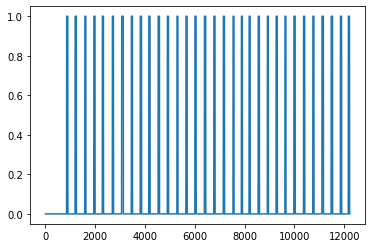

In [55]:
plt.plot(hot_ol)

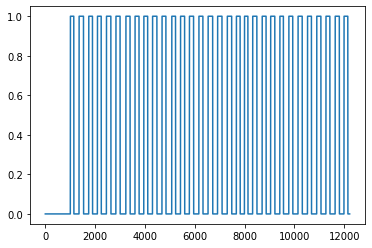

In [56]:
plt.plot(on_ol)

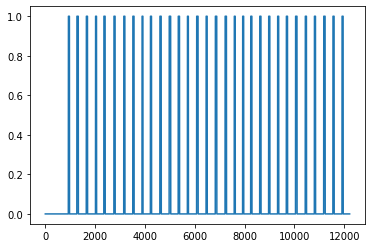

In [57]:
plt.plot(off_ol)

In [58]:
def timestamp_check(time_array):
    
    delta_t = time_array[1:] - time_array[:-1]
    return delta_t

In [59]:
time_stamp = np.array(data['t'])
delta_t = timestamp_check(time_stamp)

In [81]:
for ch in range(int(len(delta_t)/300)):
    print(ch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


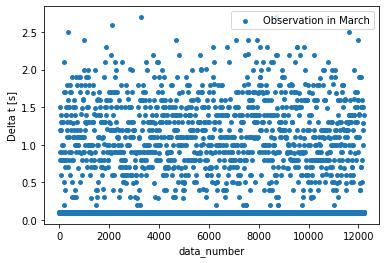

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.arange(len(delta_t)),delta_t, s=15, label='Observation in March')
ax.set_xlabel('data_number')
ax.set_ylabel('Delta t [s]')
ax.legend()

fig.savefig('/home/amigos/seigyo/analy/notebook_2020/Nishioka/delta_t_test.pdf')

In [76]:
np.mean(delta_t)

0.20481412810442412

In [77]:
np.std(delta_t)

0.3487935993828006

In [78]:
np.var(delta_t)

0.12165697497040957

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retai

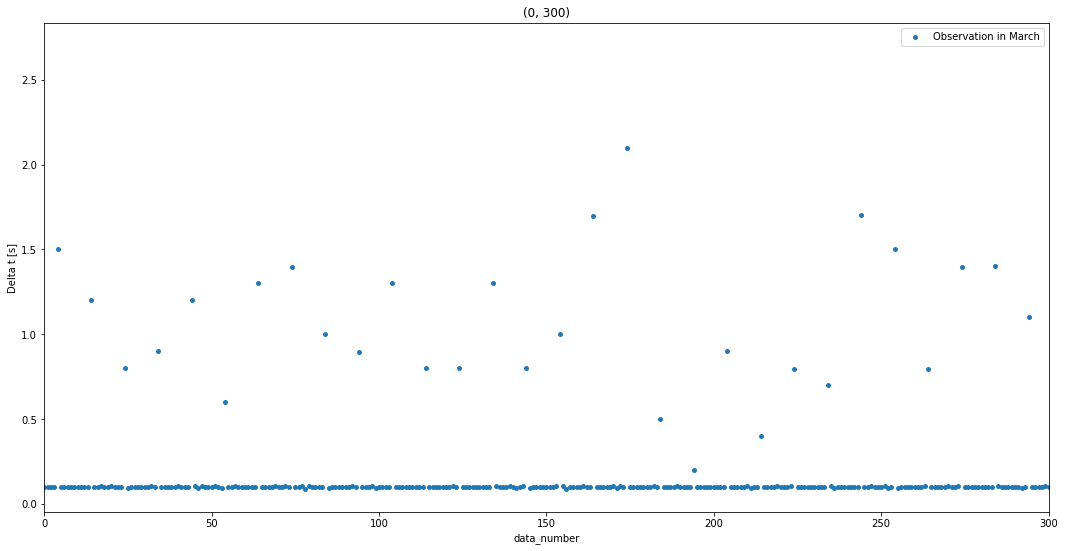

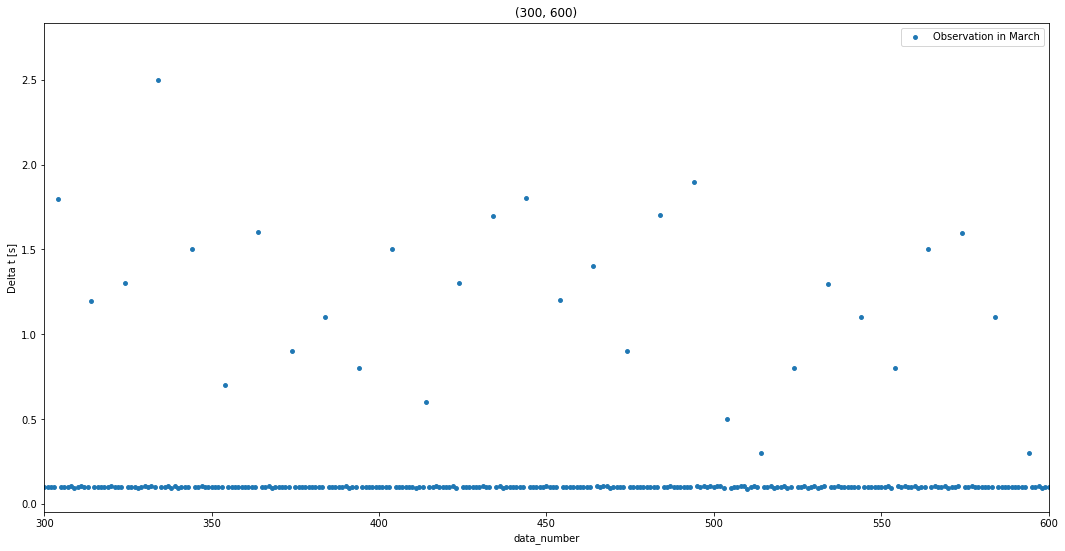

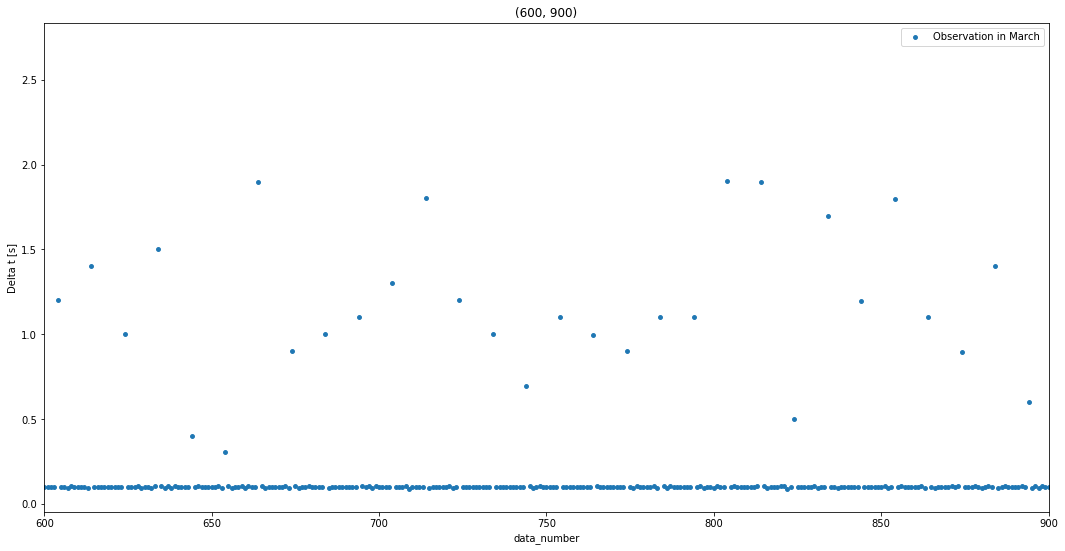

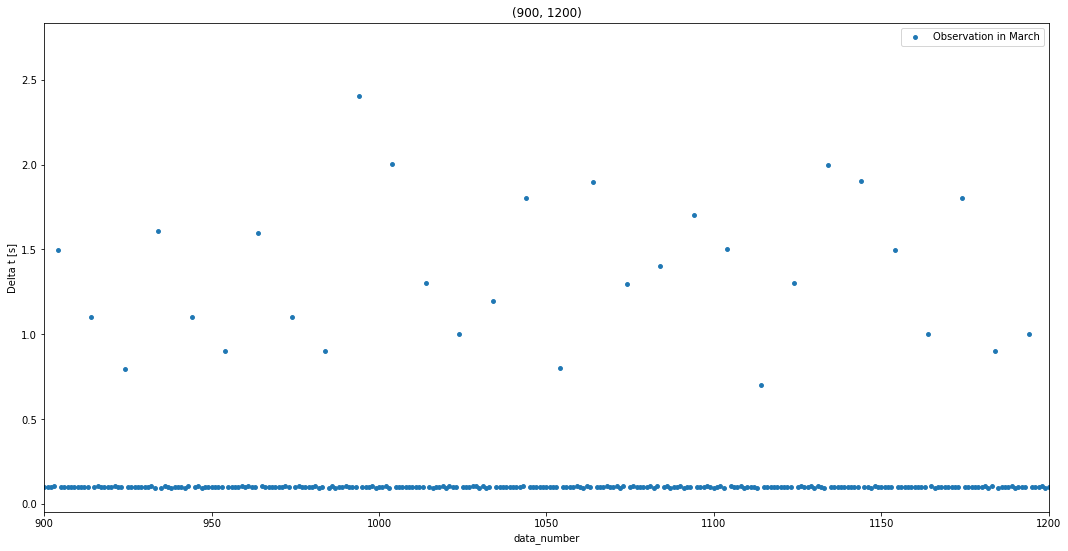

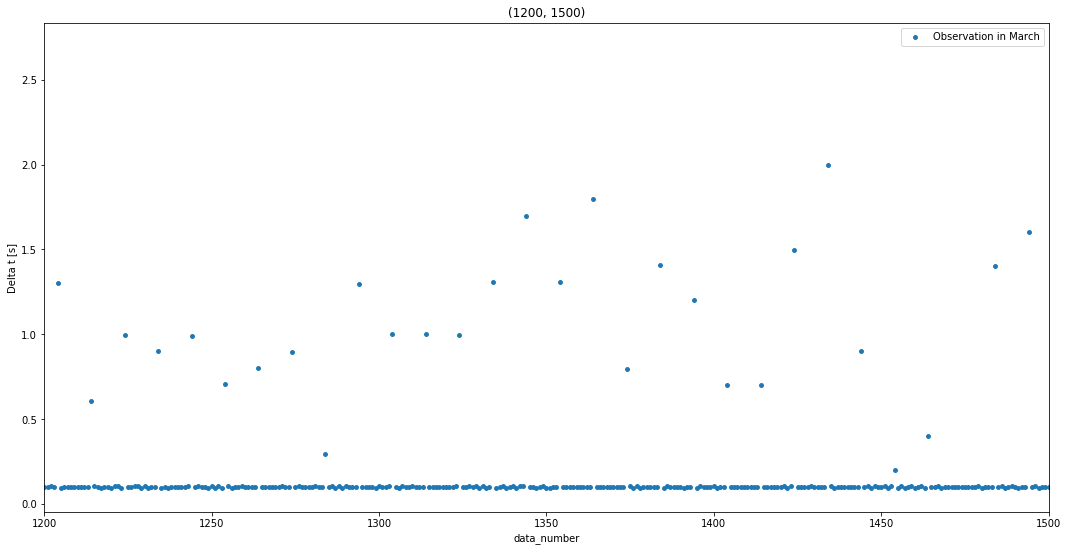

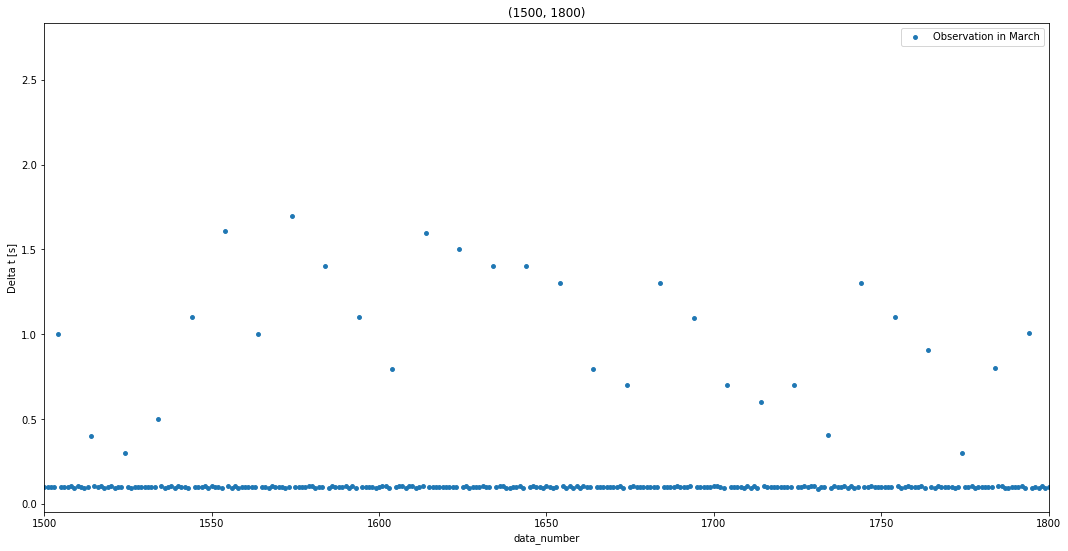

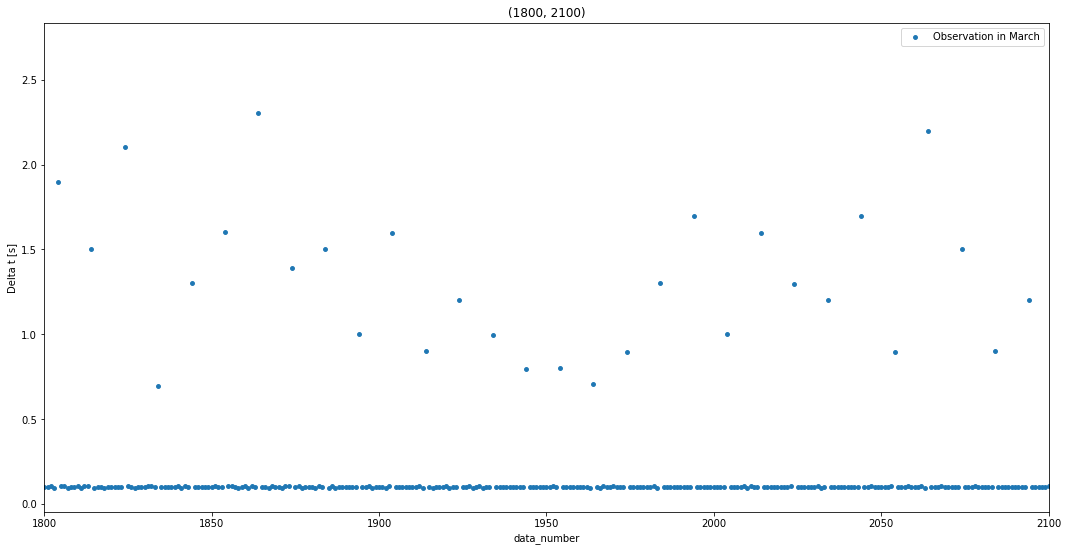

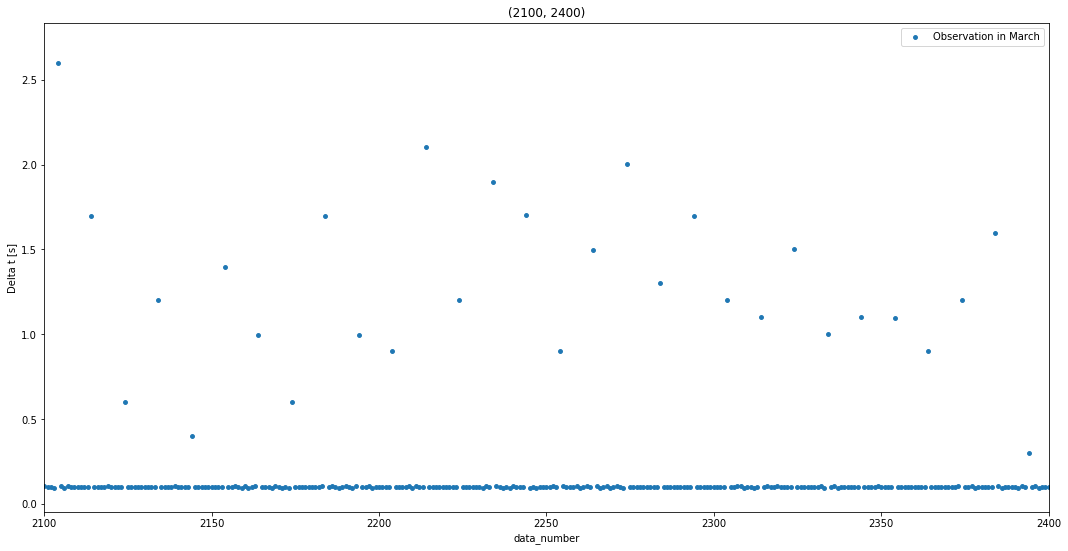

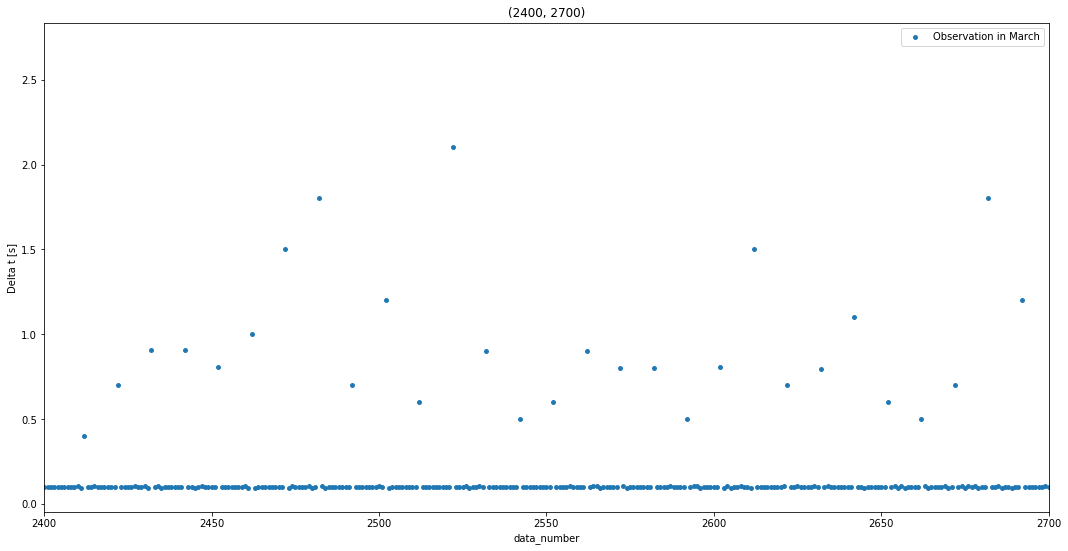

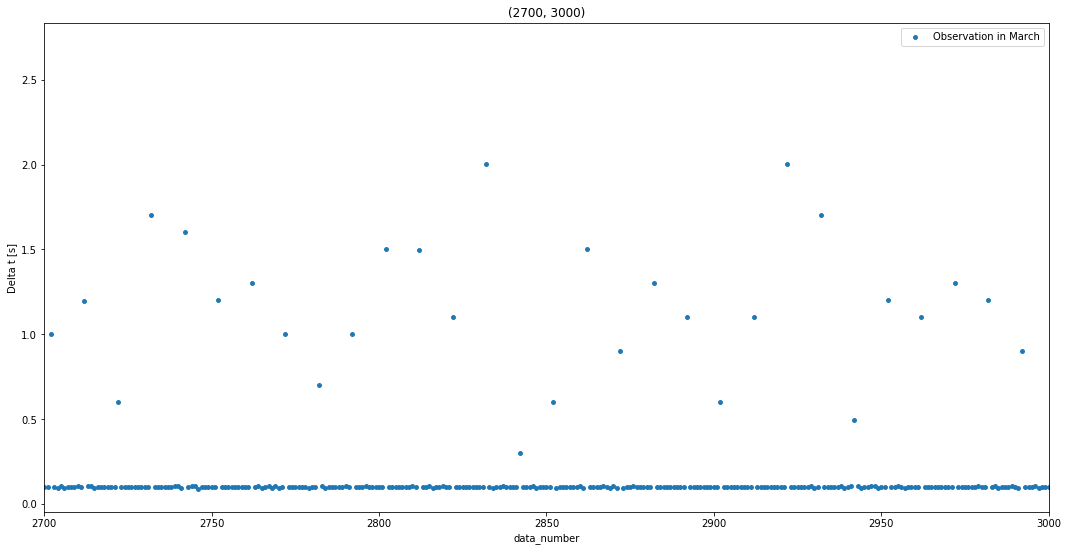

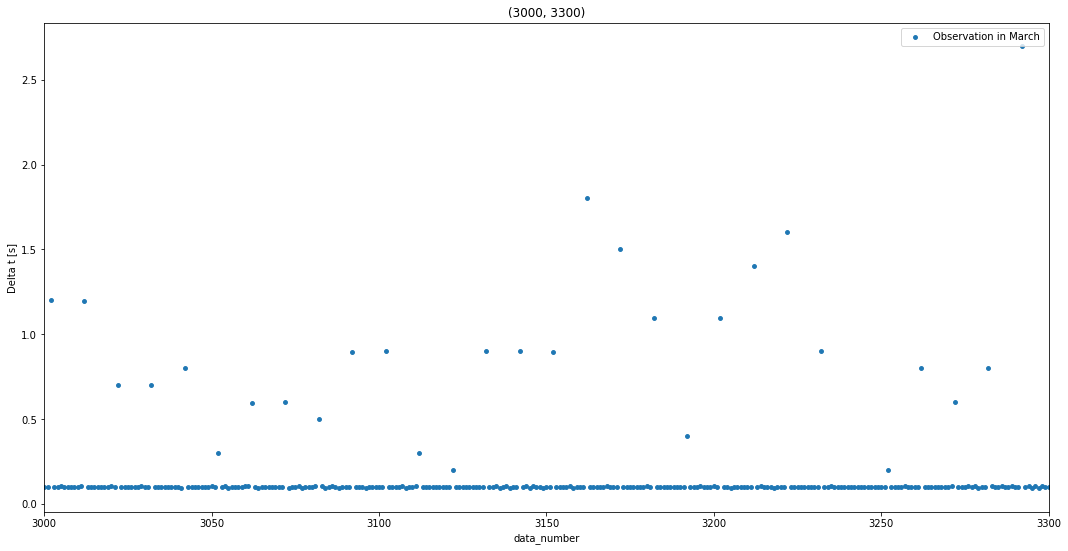

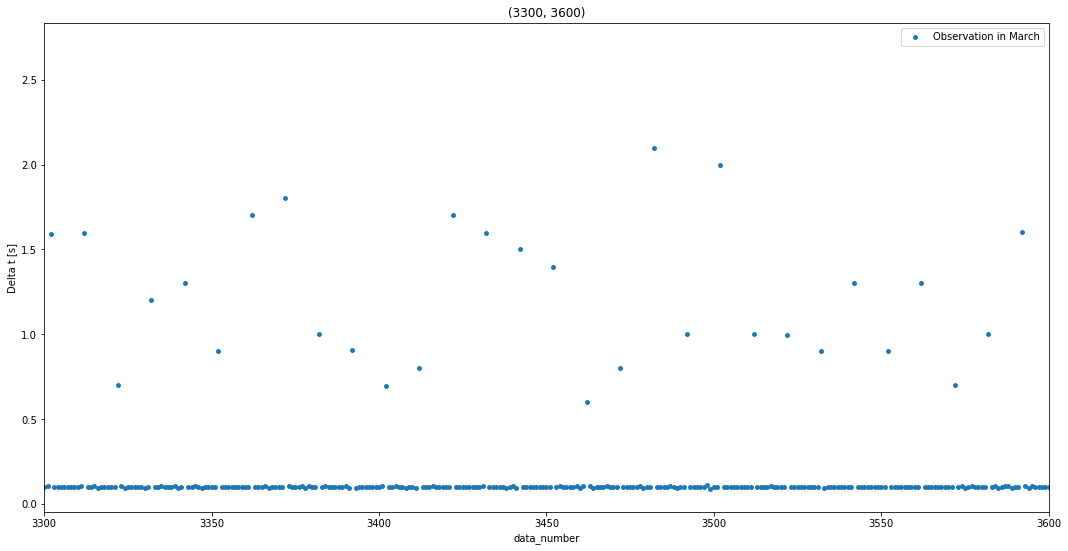

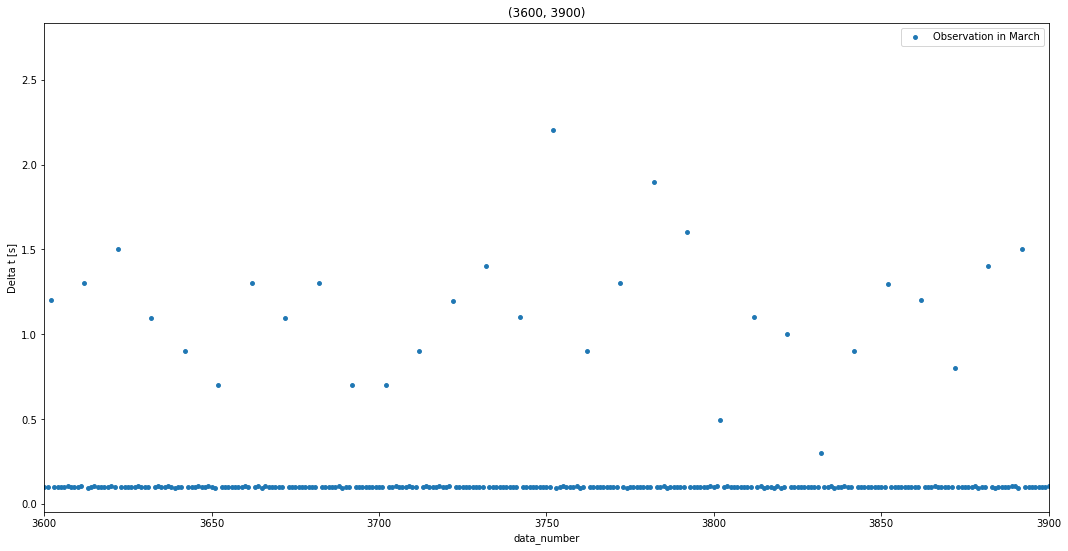

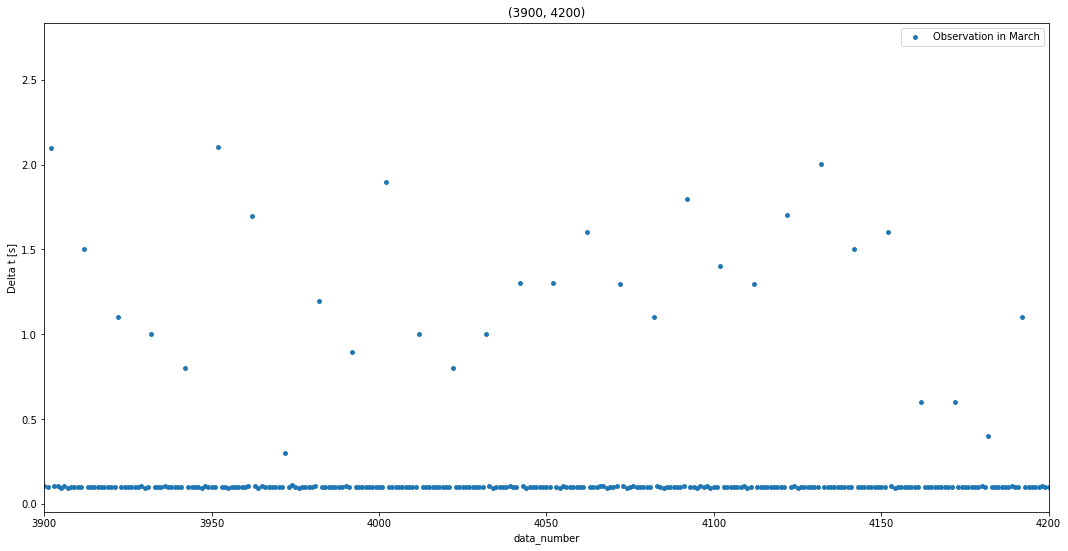

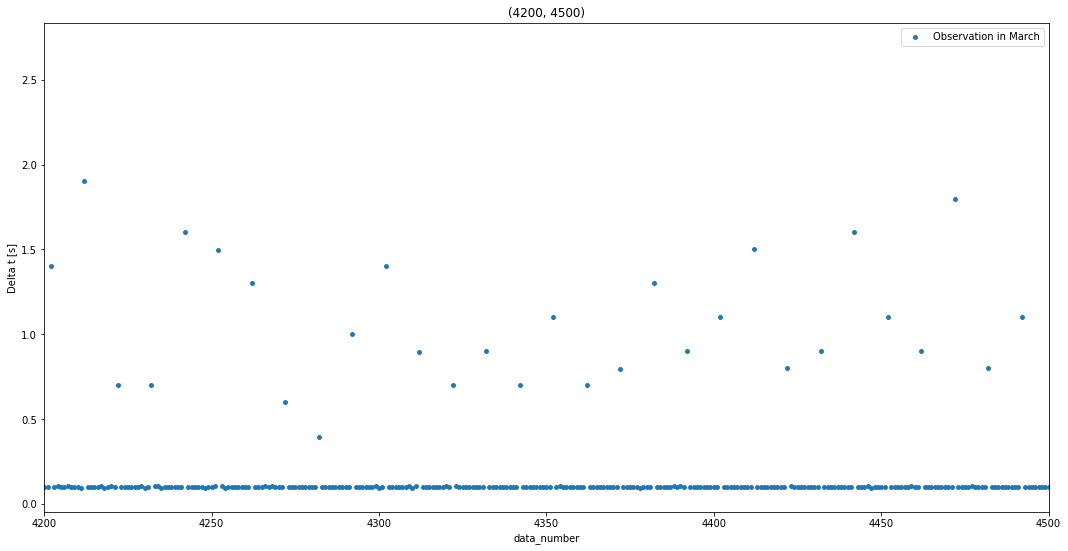

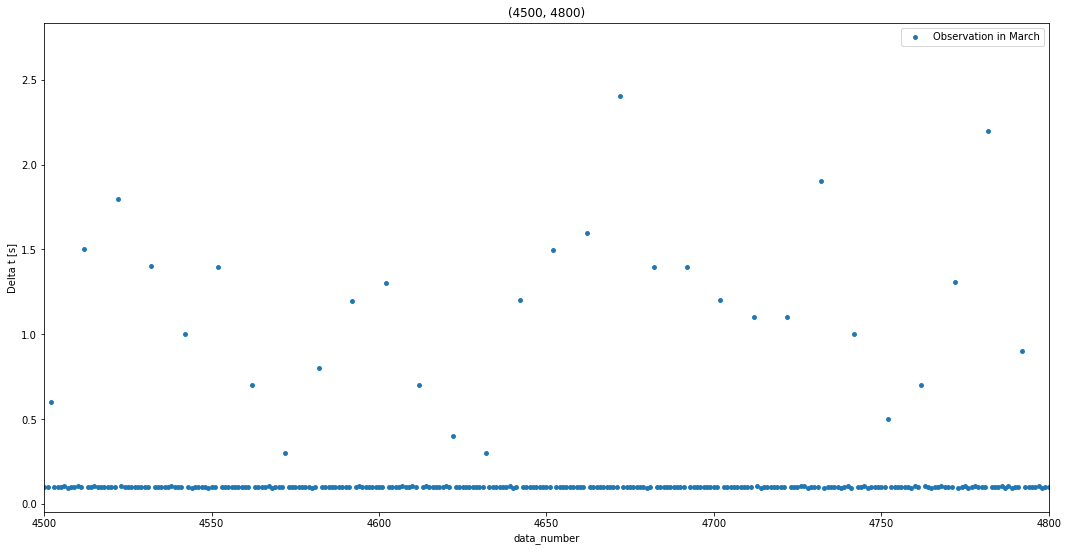

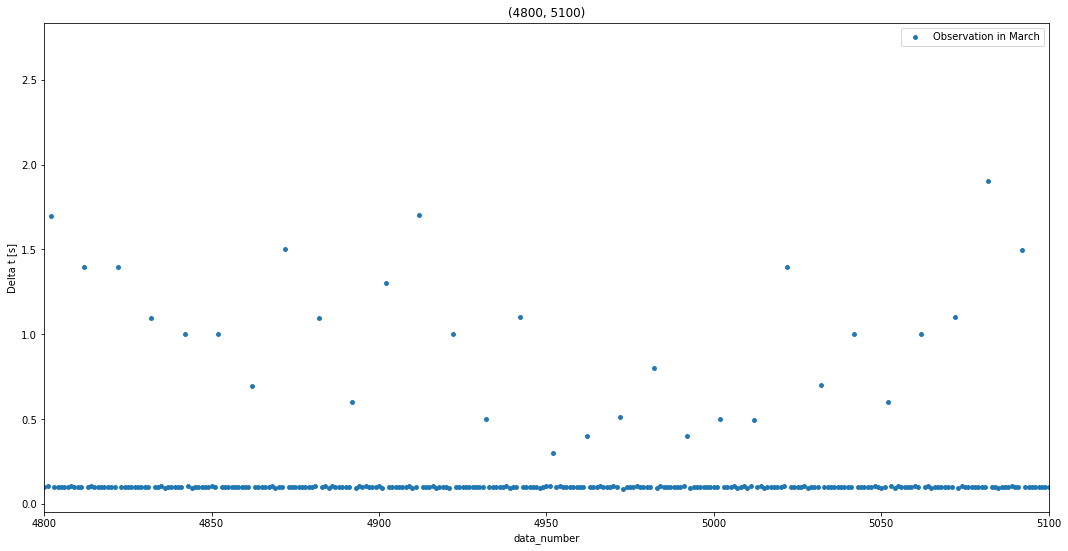

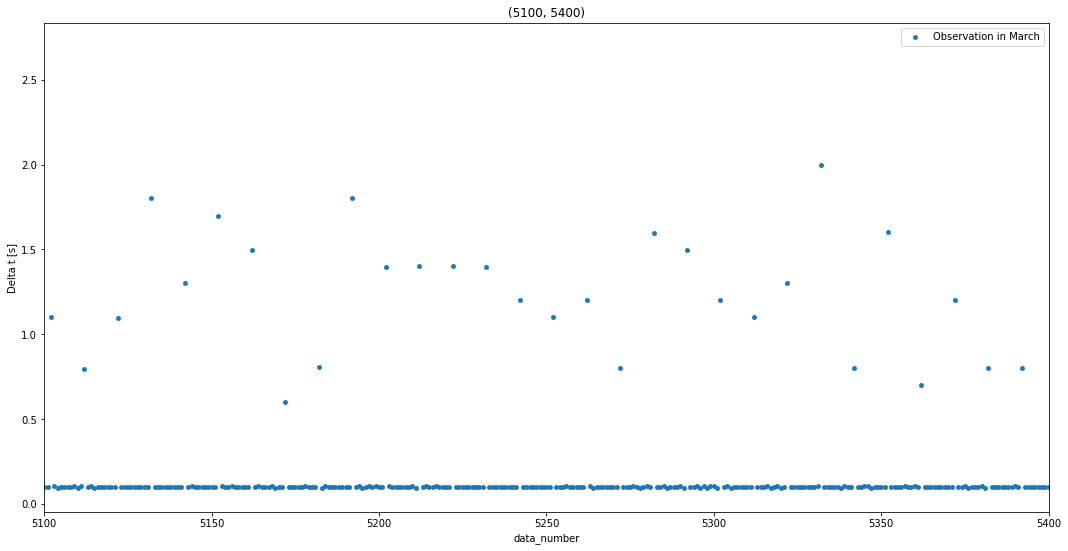

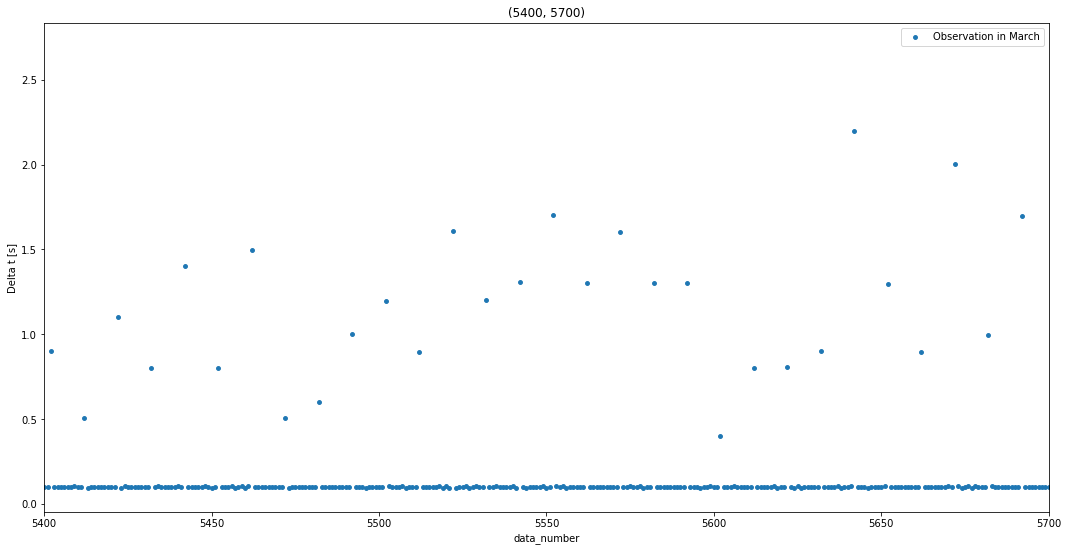

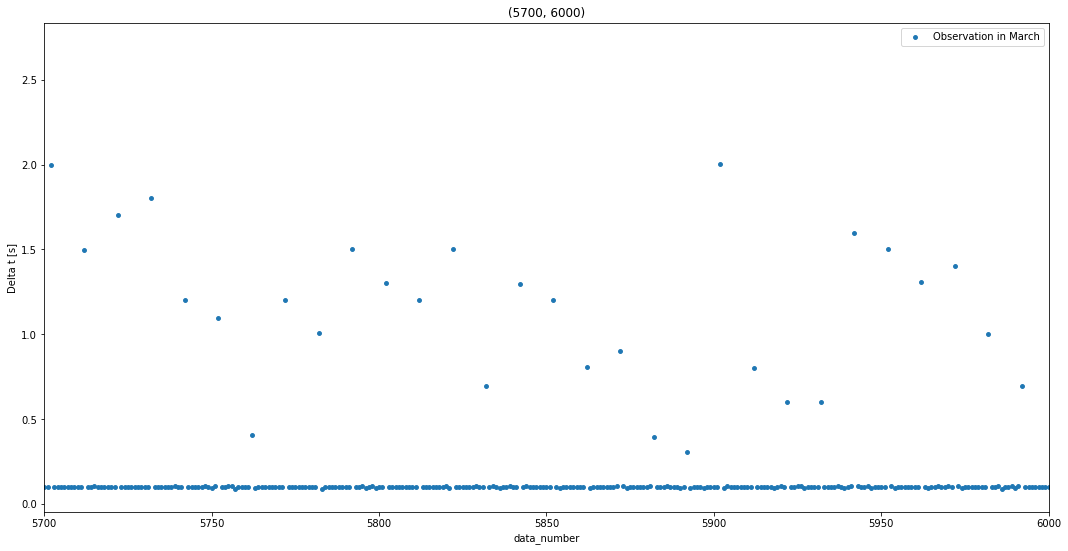

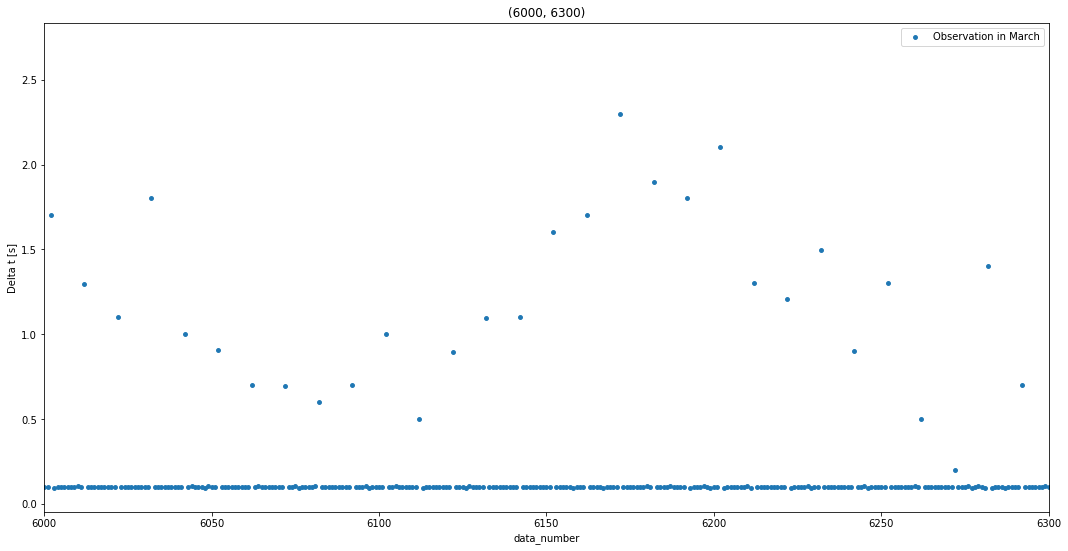

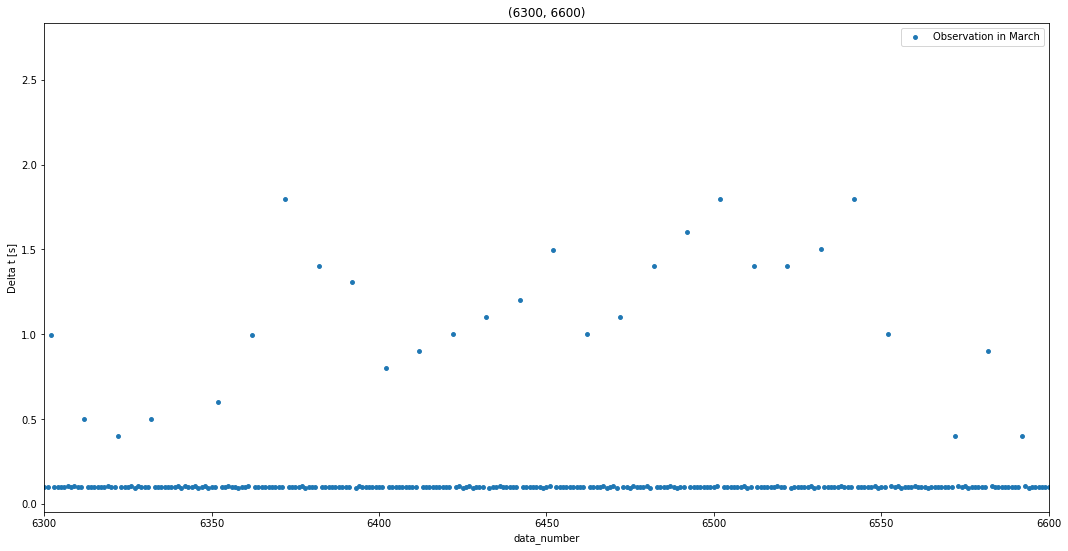

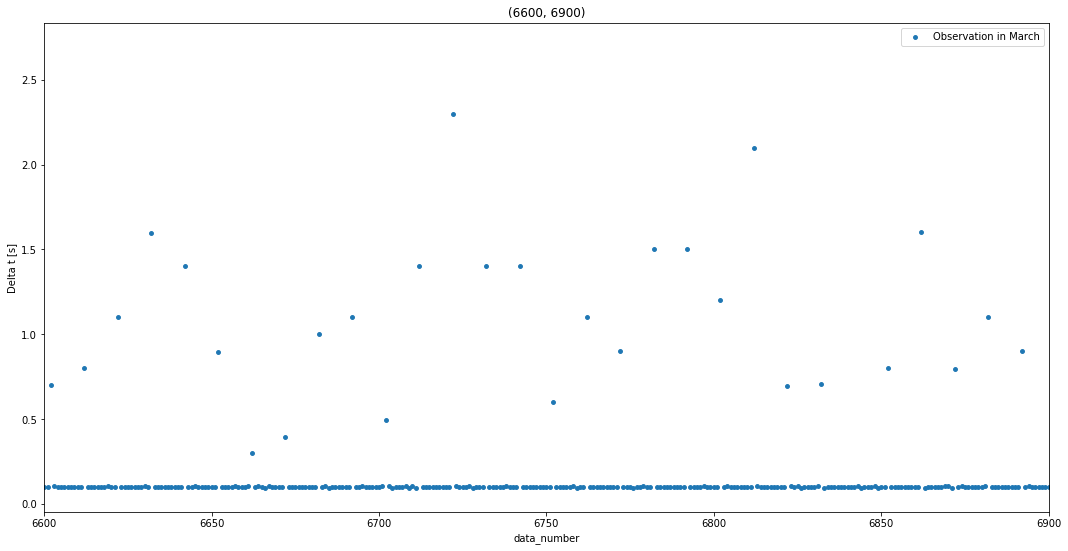

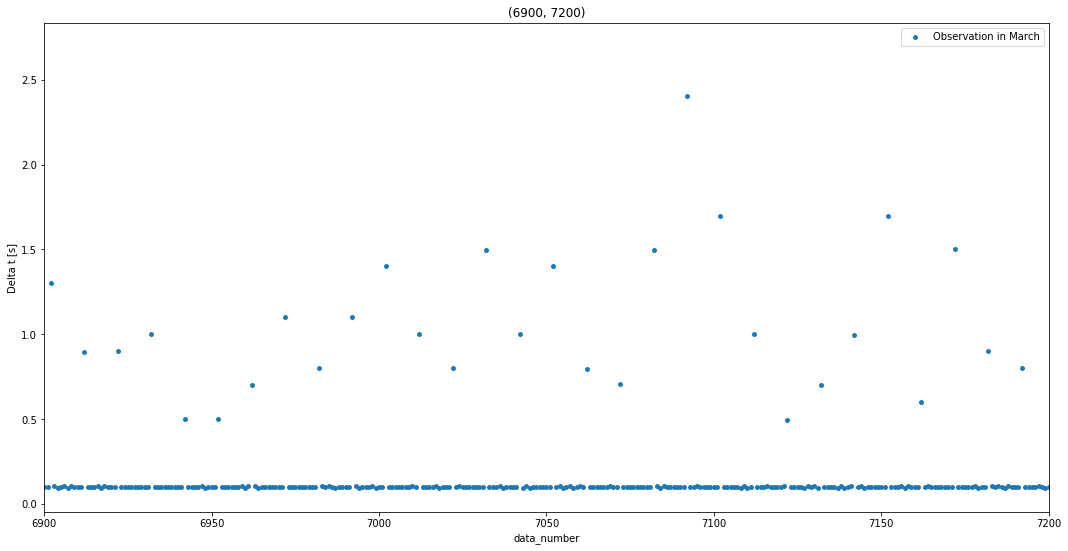

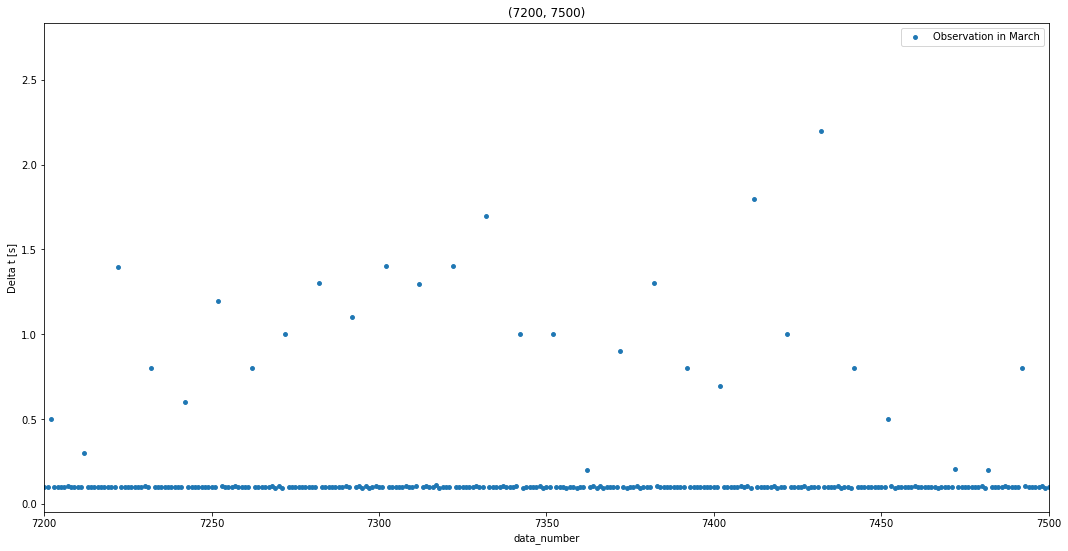

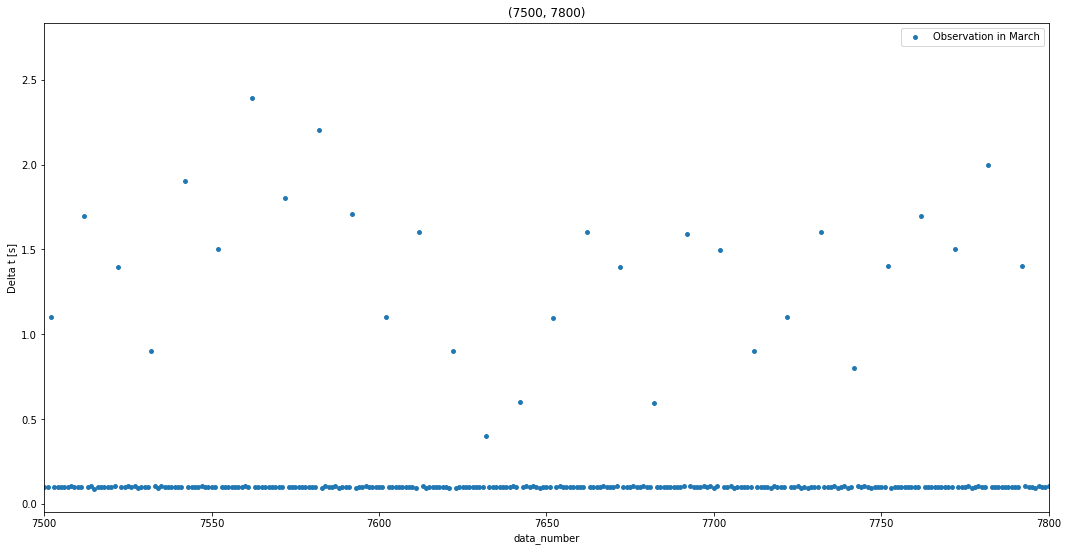

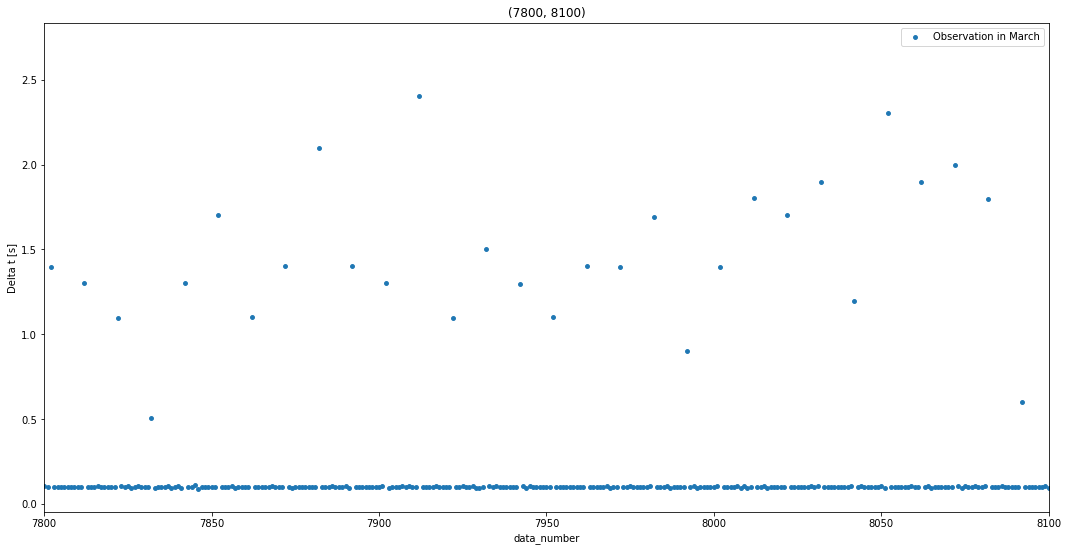

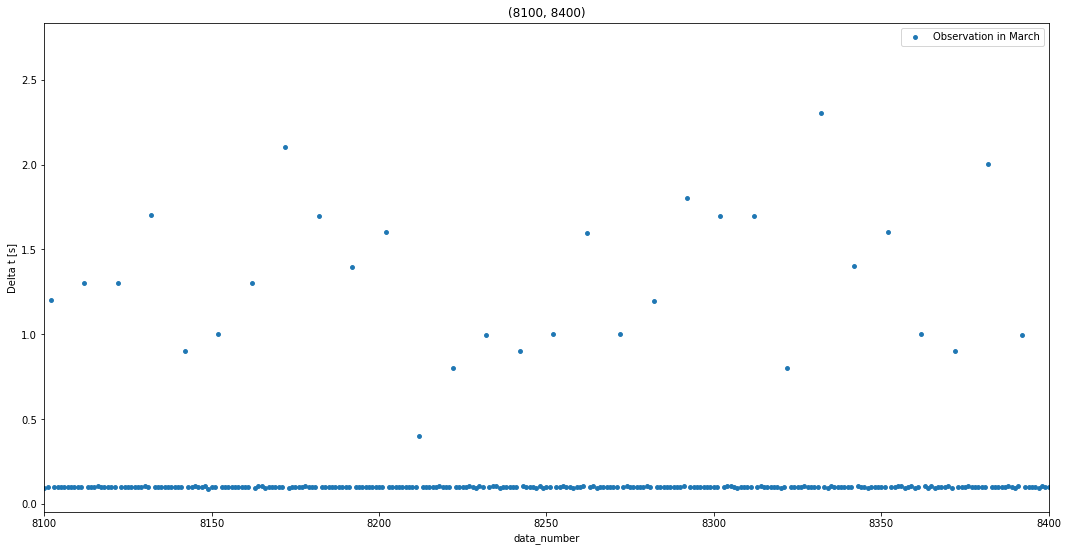

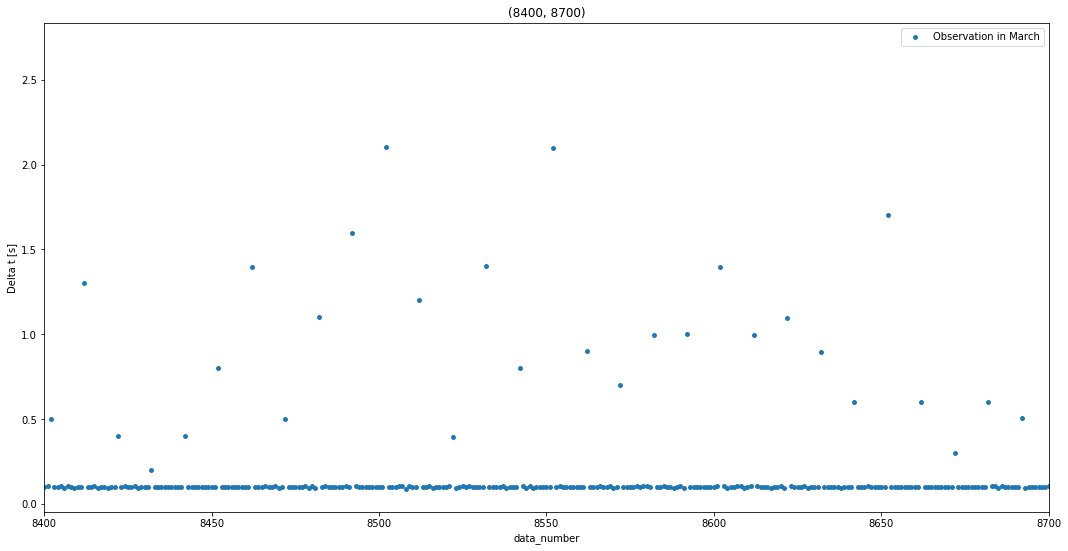

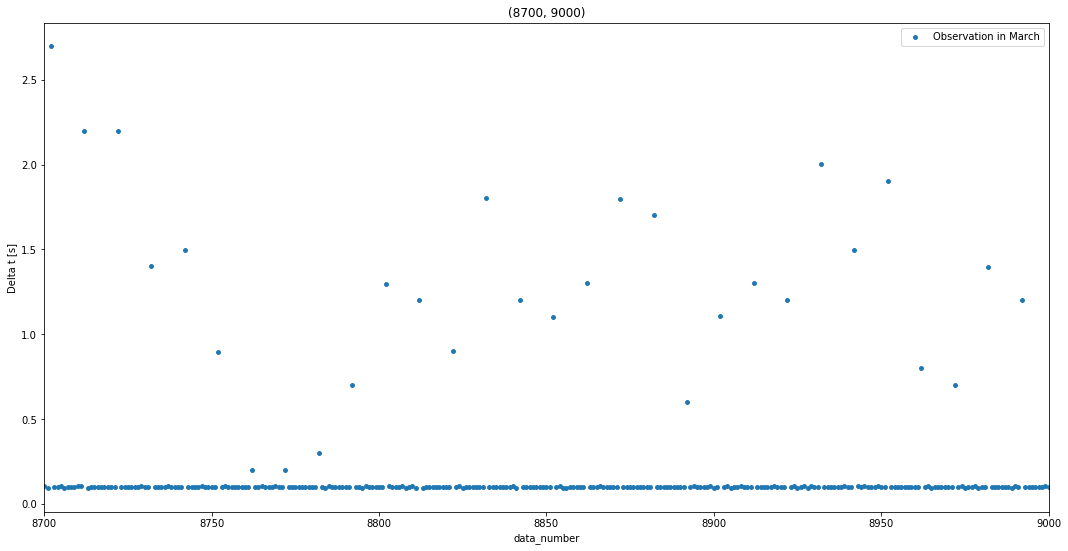

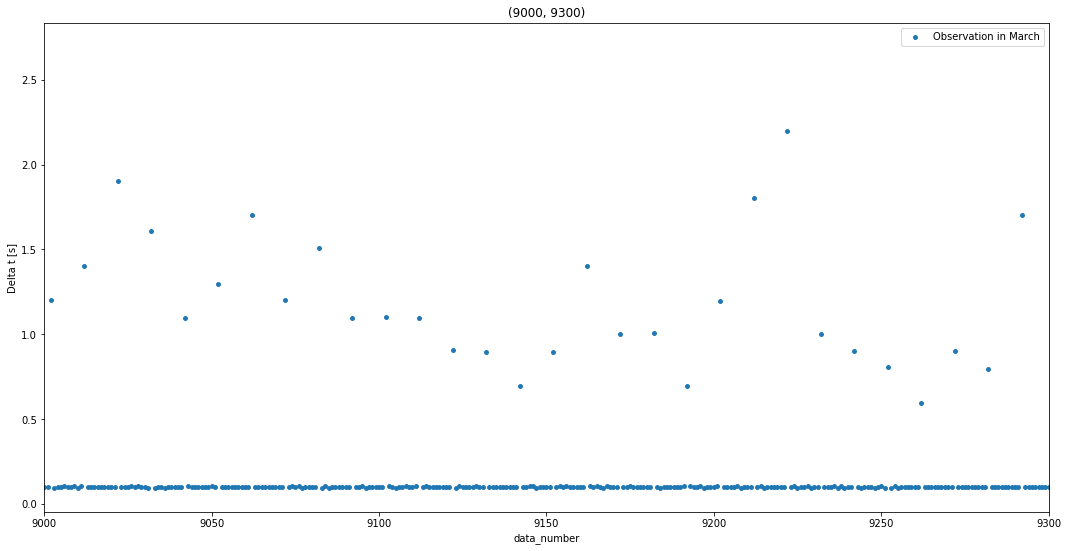

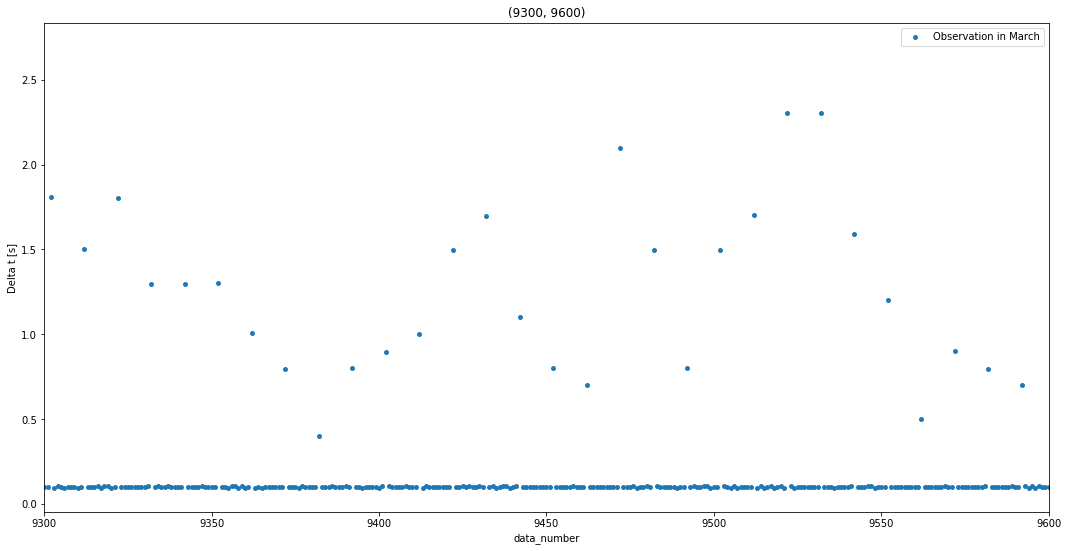

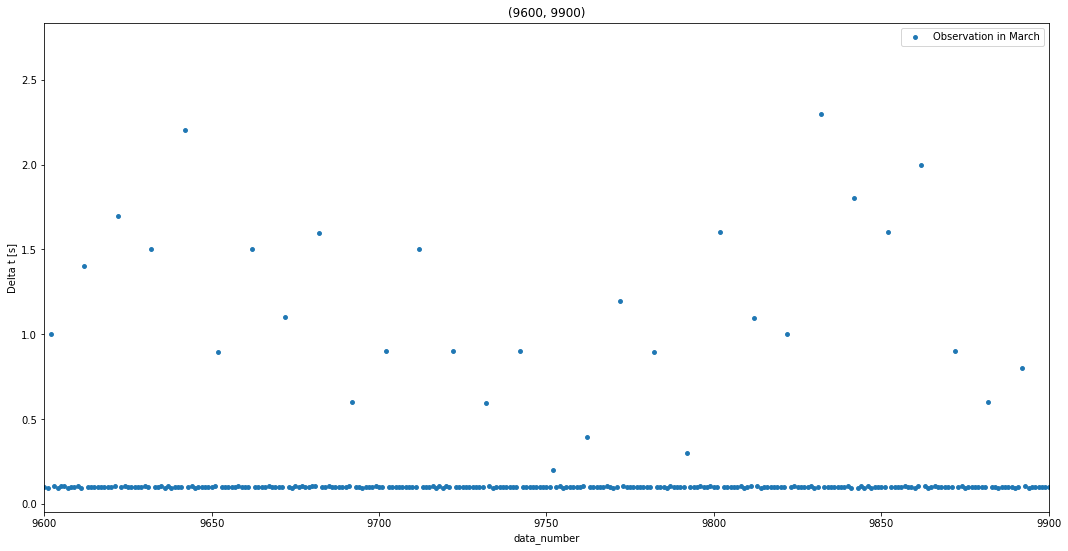

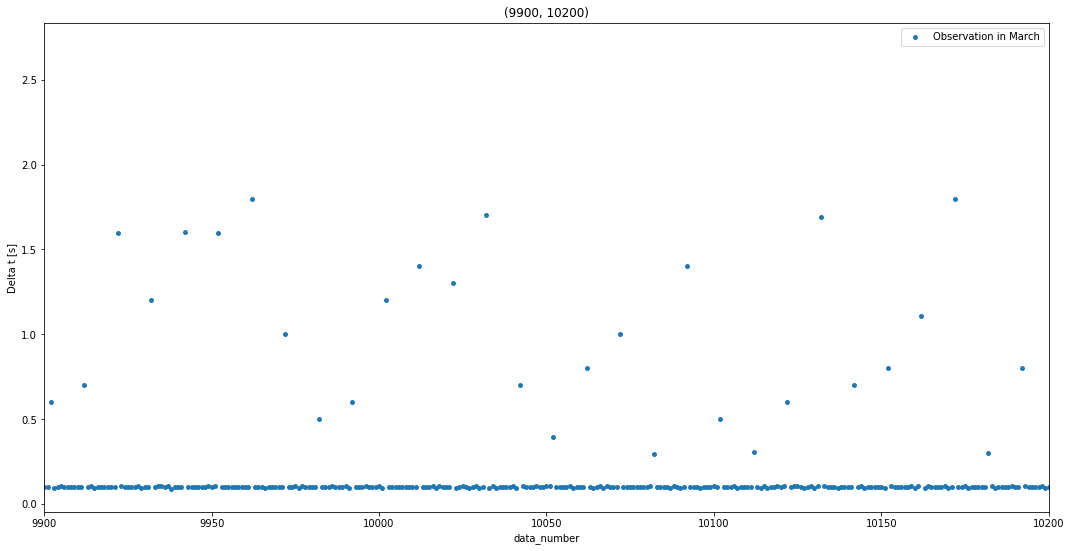

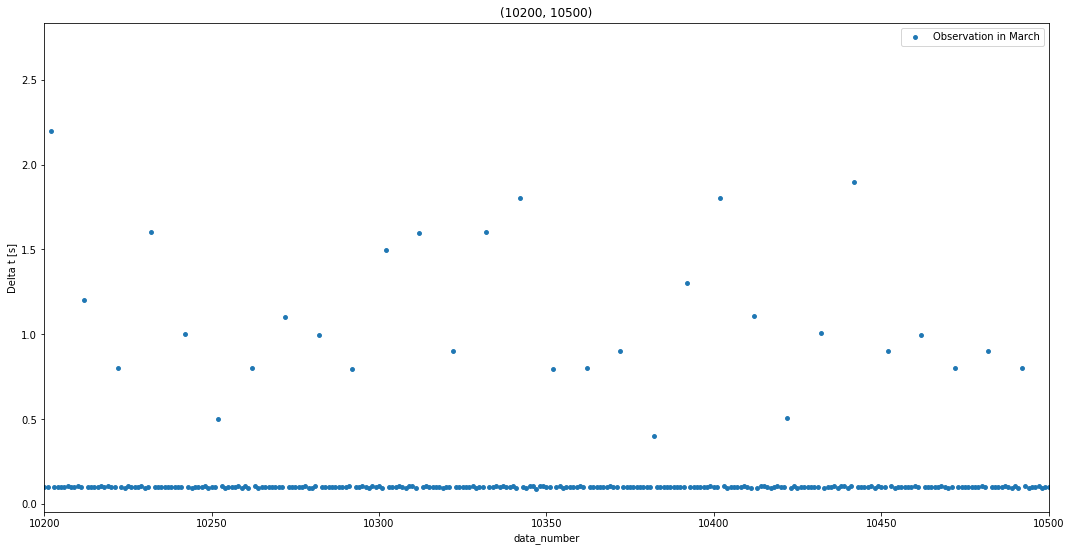

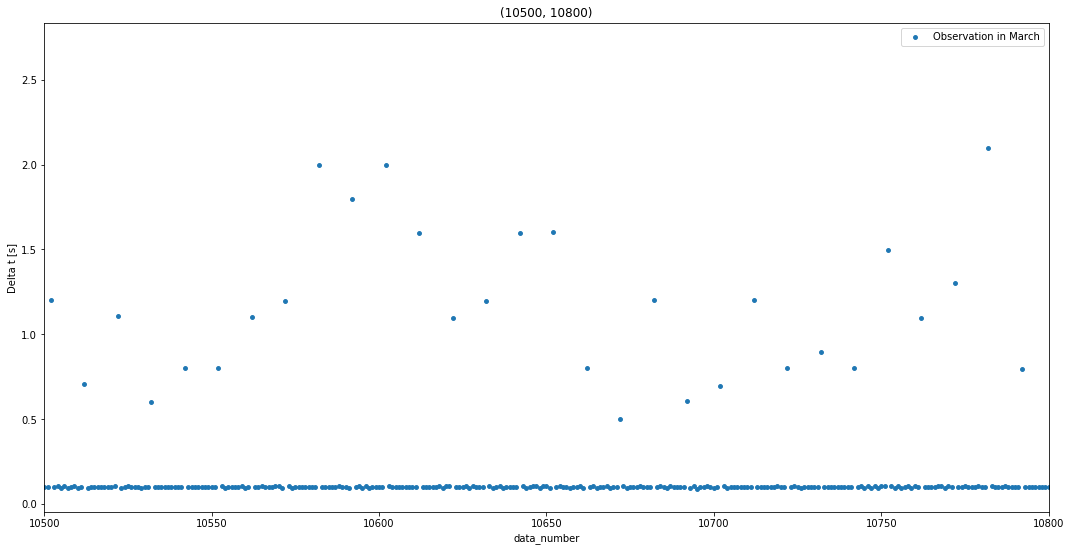

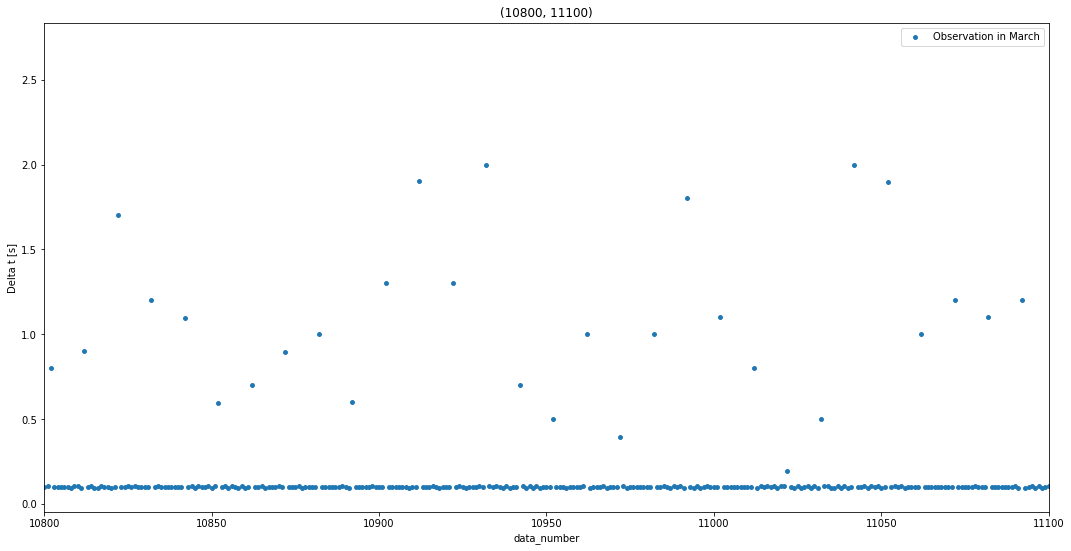

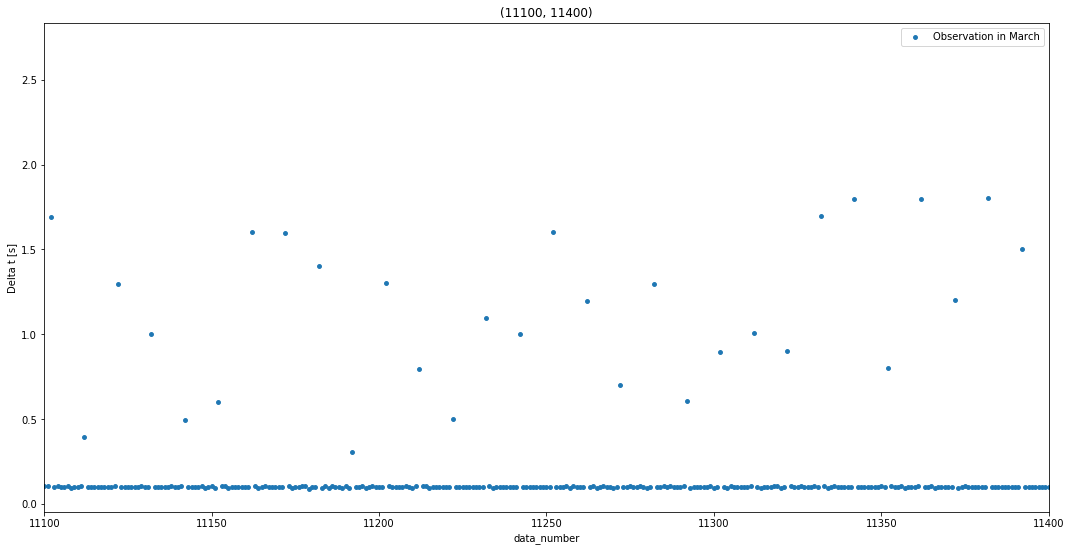

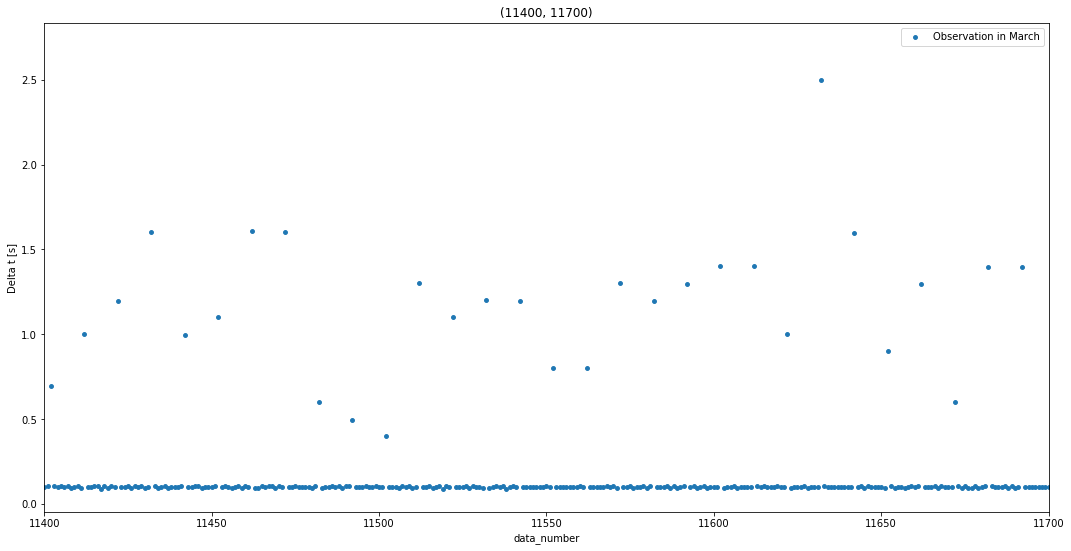

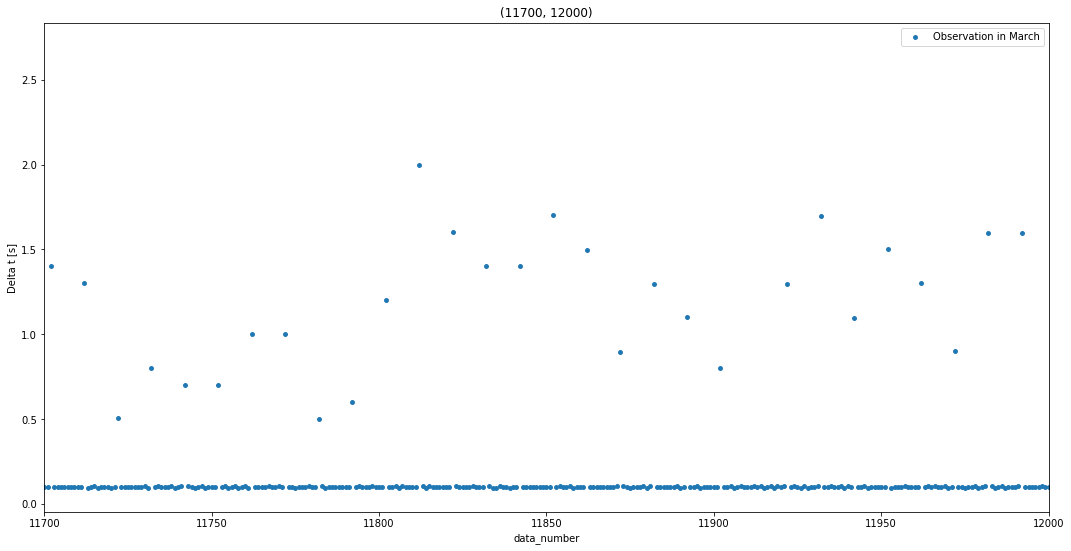

In [85]:
for i in range(int(len(delta_t)/300)):
    fig = plt.figure(figsize = (18,9))
    ax = fig.add_subplot(111)
    ax.scatter(np.arange(len(delta_t)),delta_t, s=15, label='Observation in March')
    ax.set_xlabel('data_number')
    ax.set_ylabel('Delta t [s]')
    ax.set_title(f'{i*300,(i+1)*300}')
    ax.set_xlim(i*300,(i+1)*300)
    ax.legend()
    
#fig.savefig(f'/home/amigos/seigyo/analy/notebook_2020/Nishioka/delta_t_number{i}.pdf')

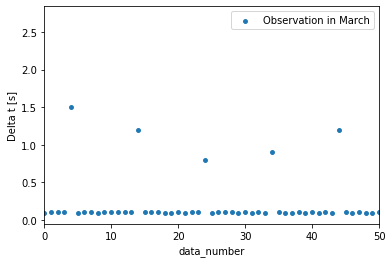

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.arange(len(delta_t)),delta_t, s=15, label='Observation in March')
ax.set_xlabel('data_number')
ax.set_ylabel('Delta t [s]')
ax.legend()
ax.set_xlim(0,50)

#fig.savefig('/home/amigos/seigyo/analy/notebook_2020/Nishioka/delta_t_test.pdf')

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


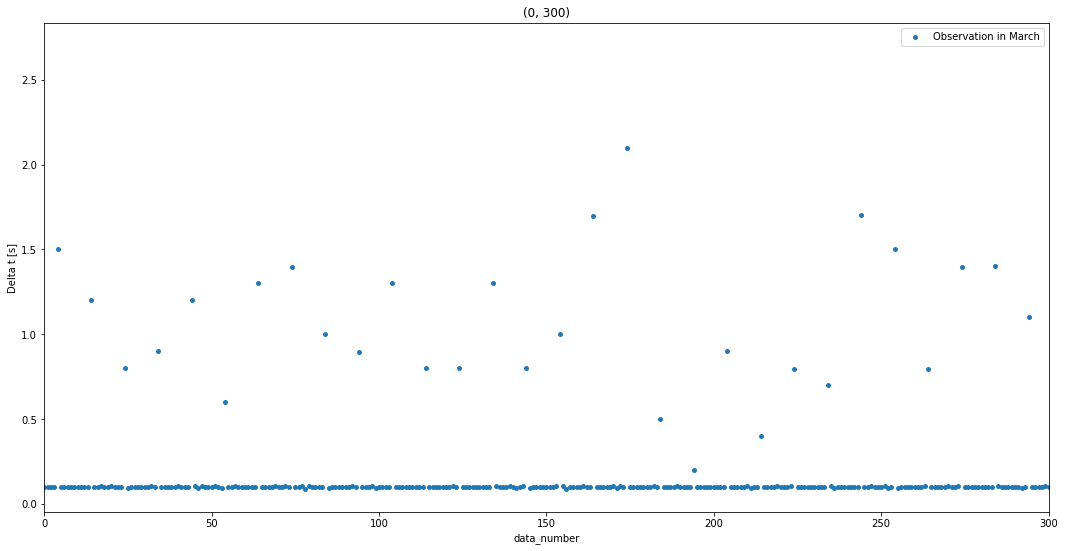

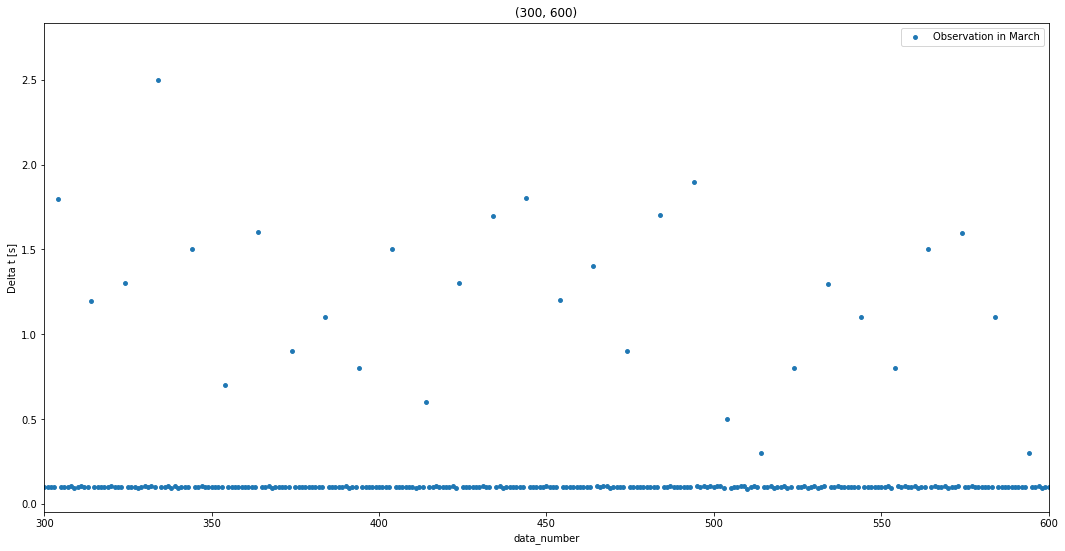

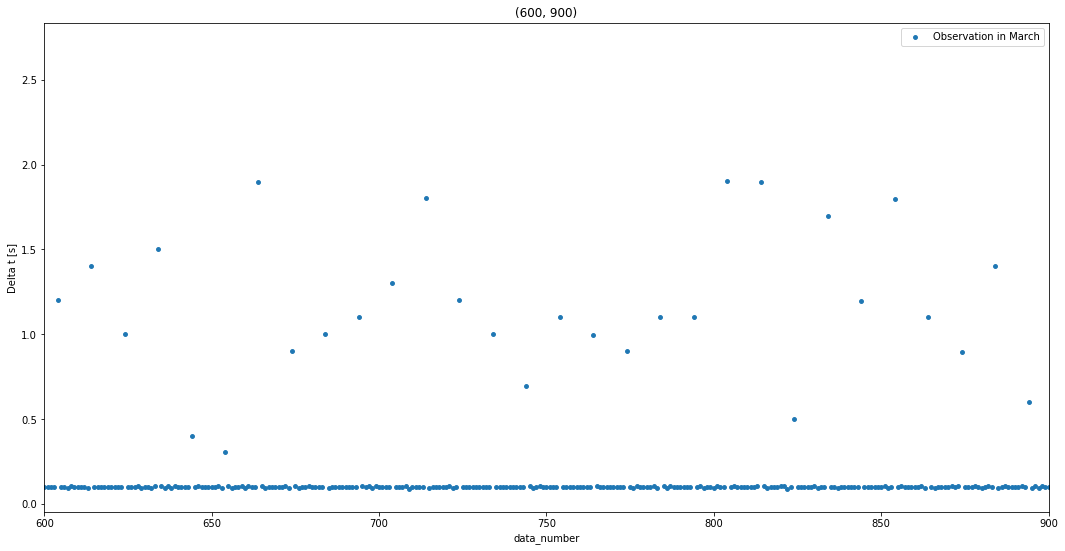

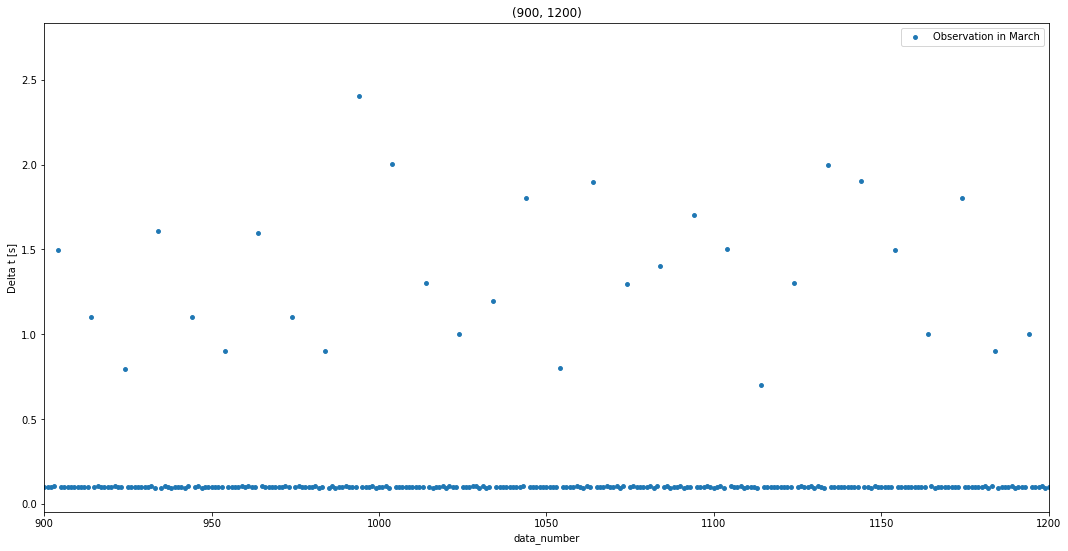

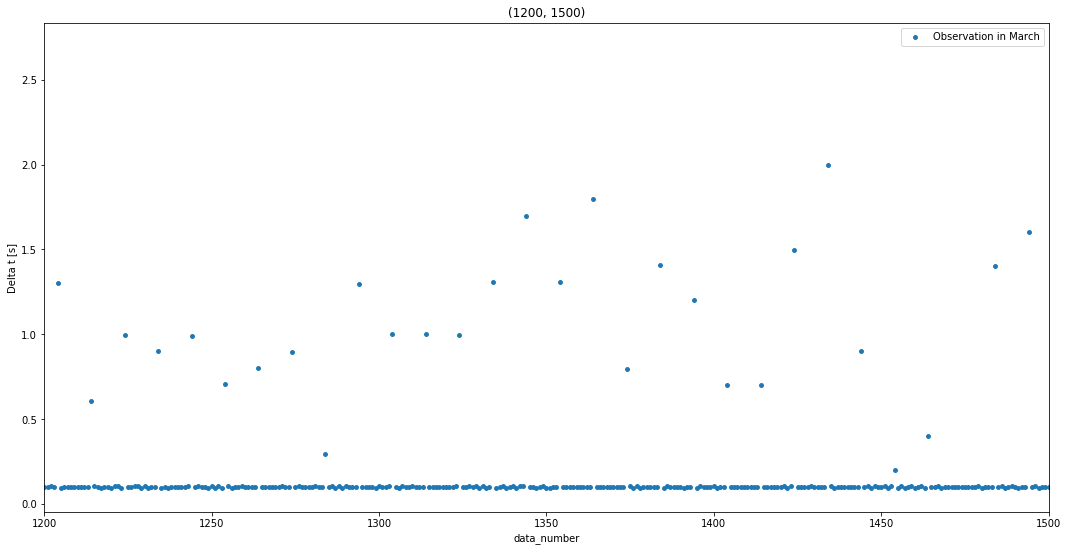

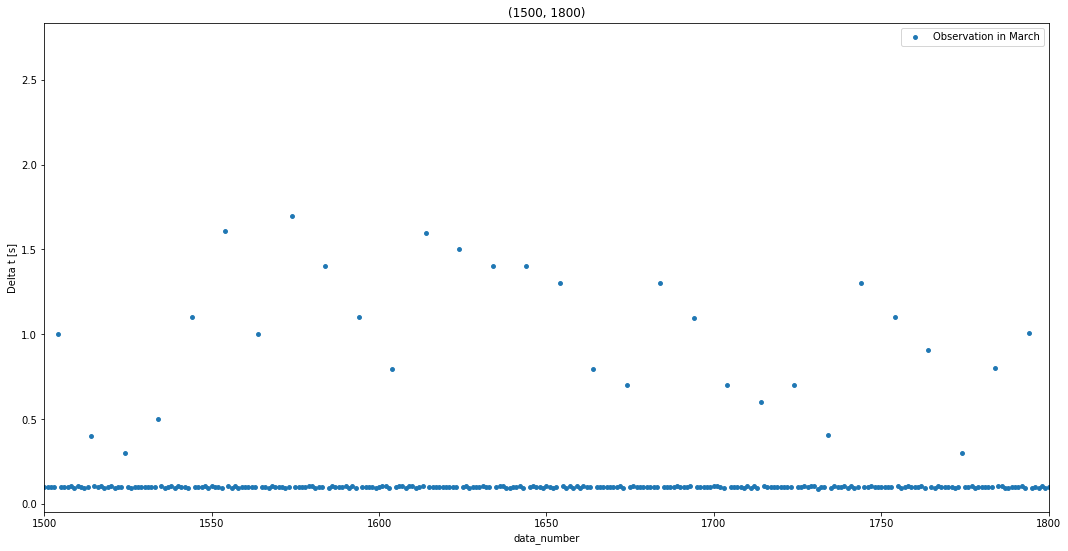

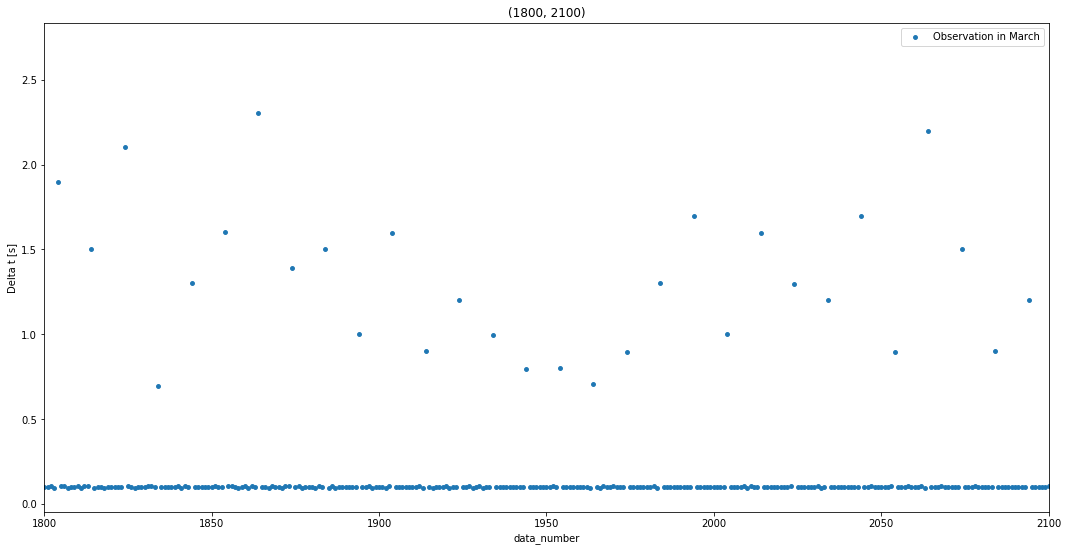

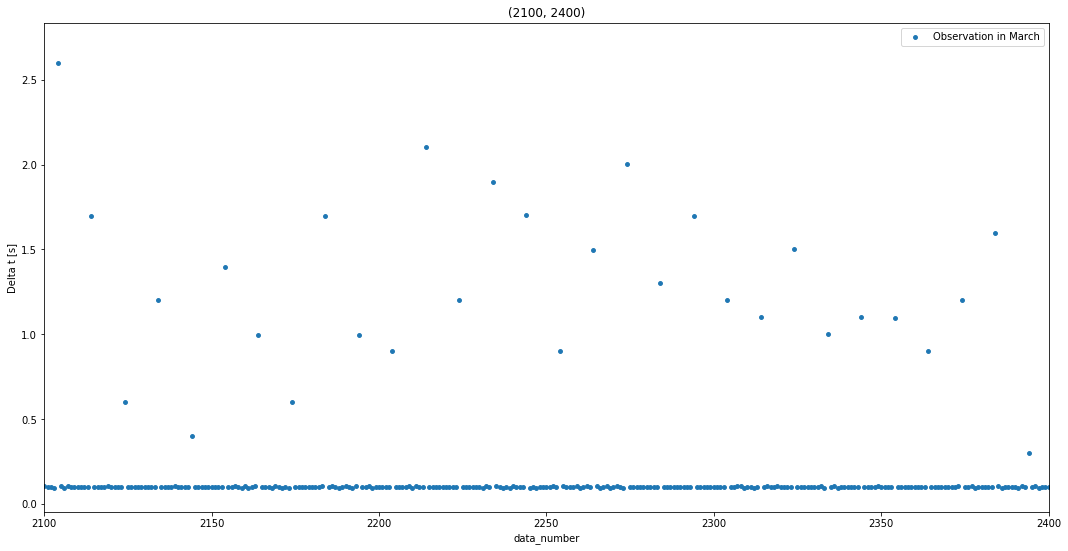

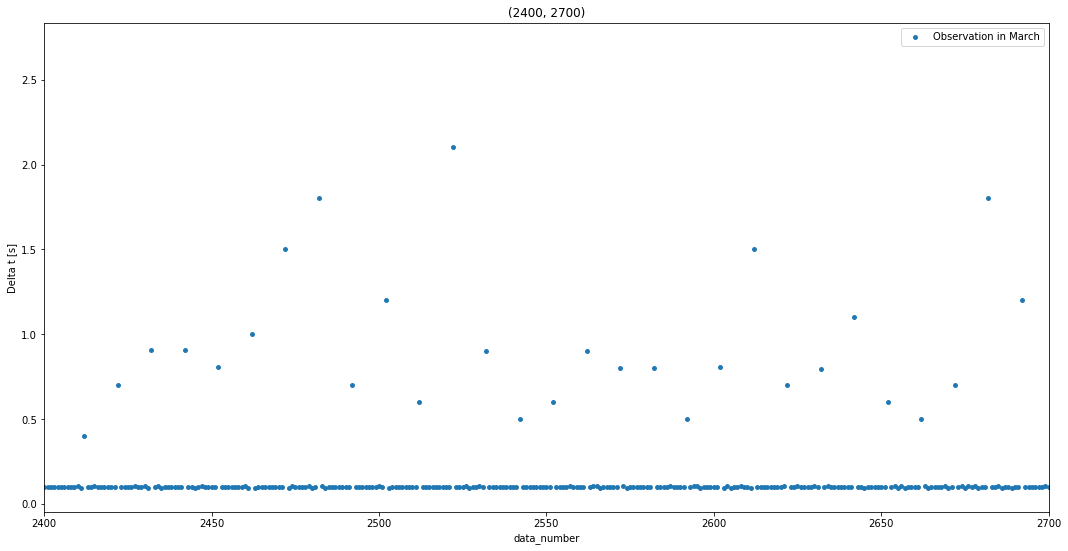

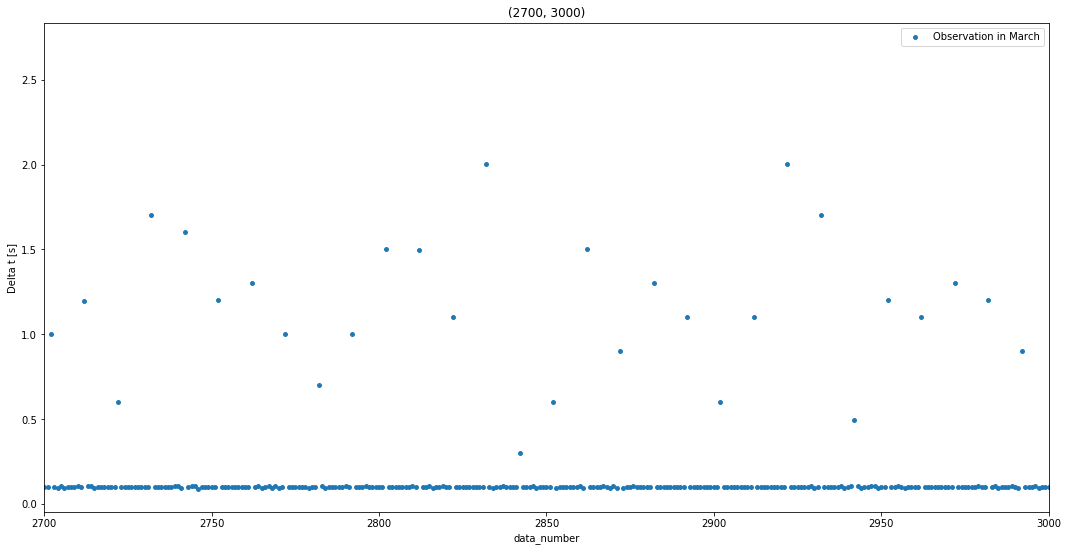

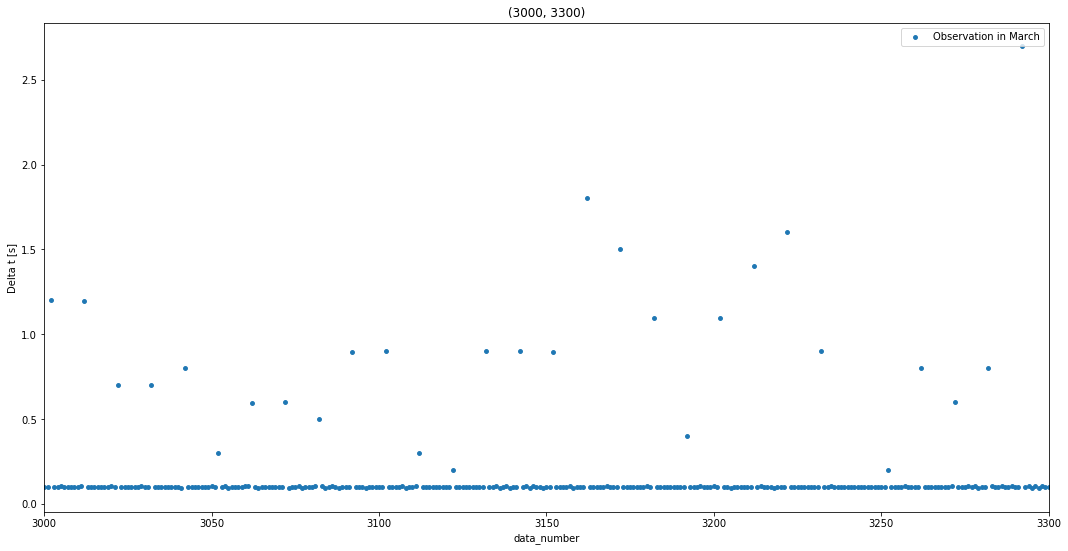

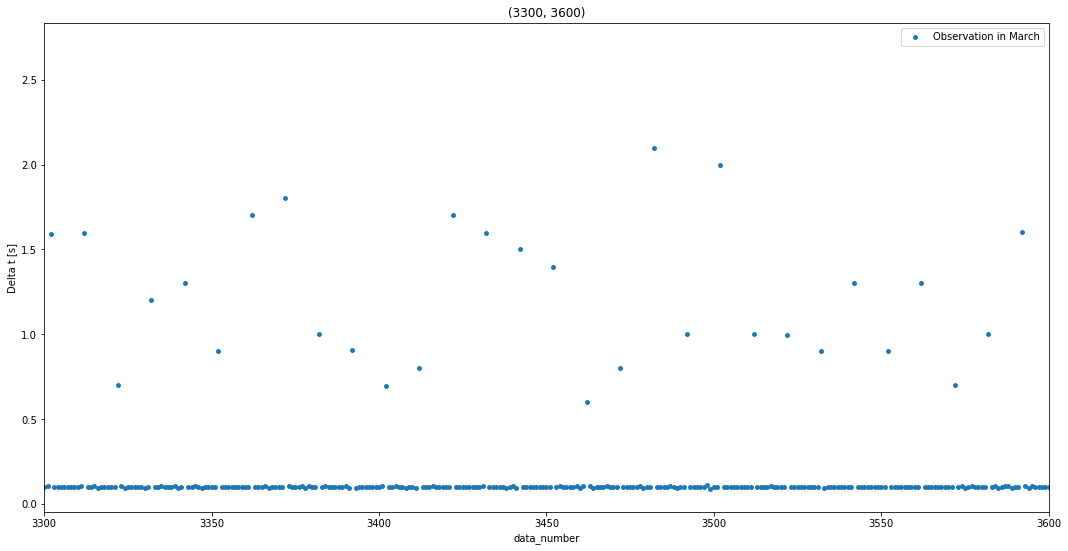

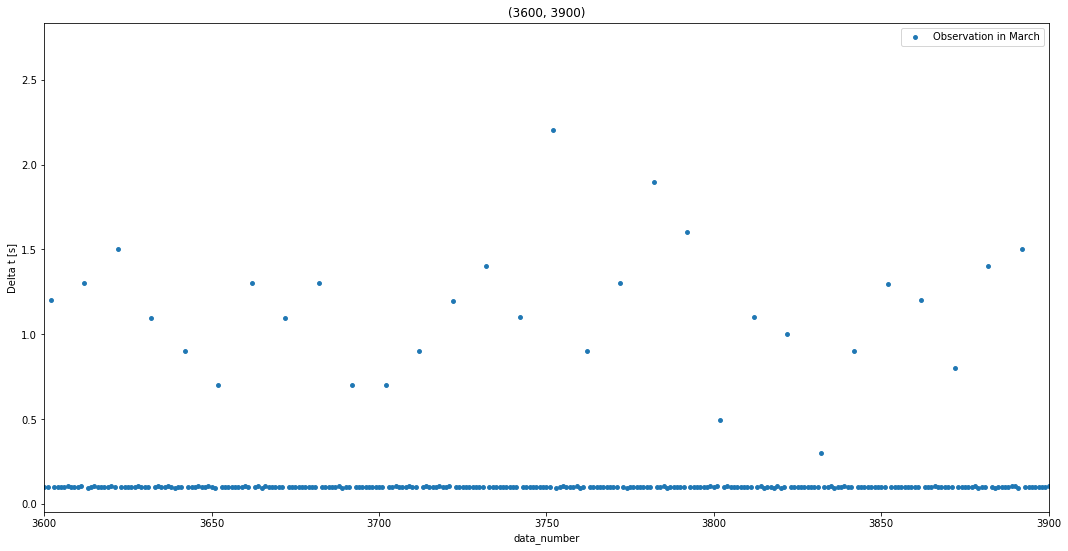

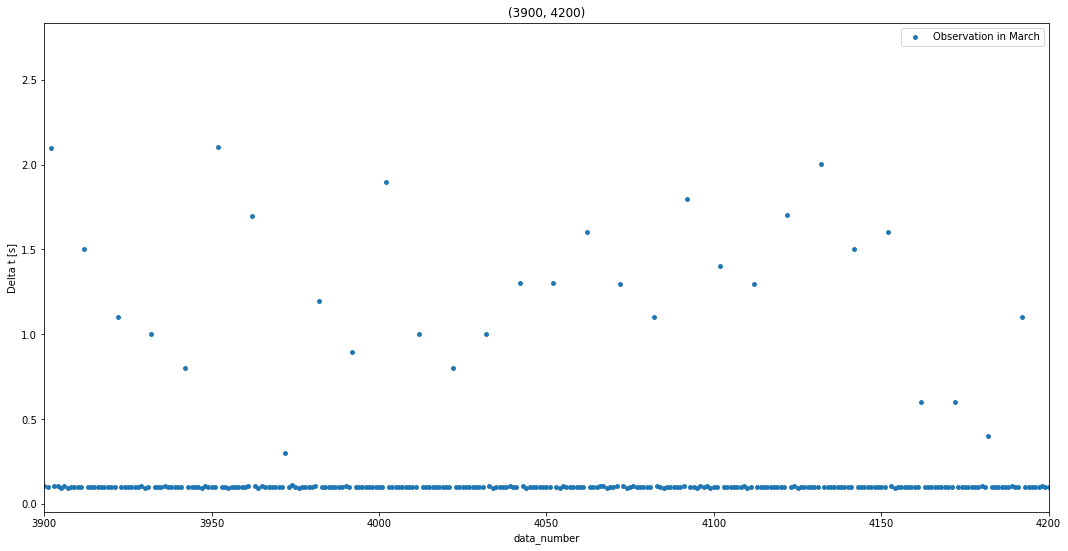

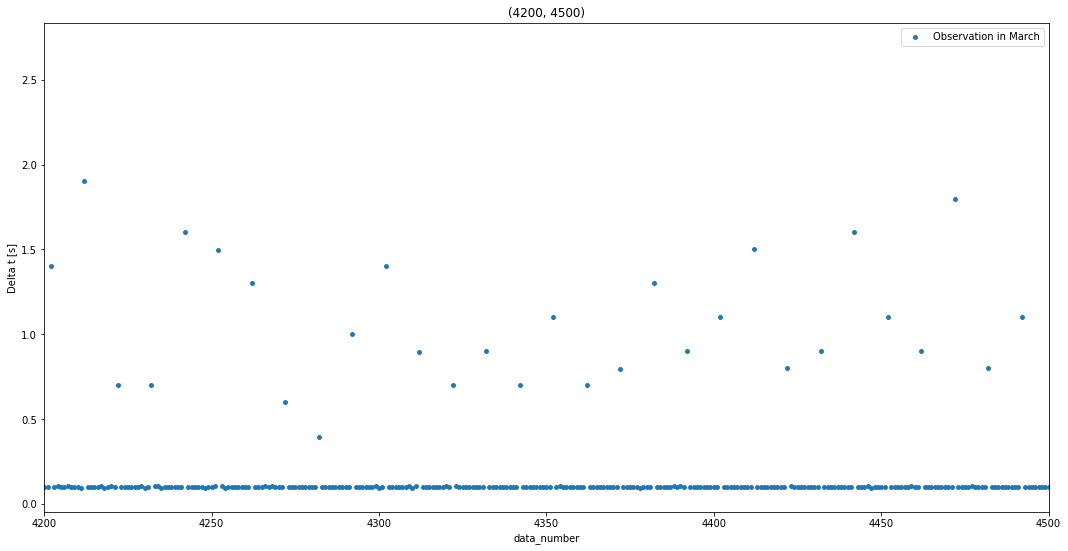

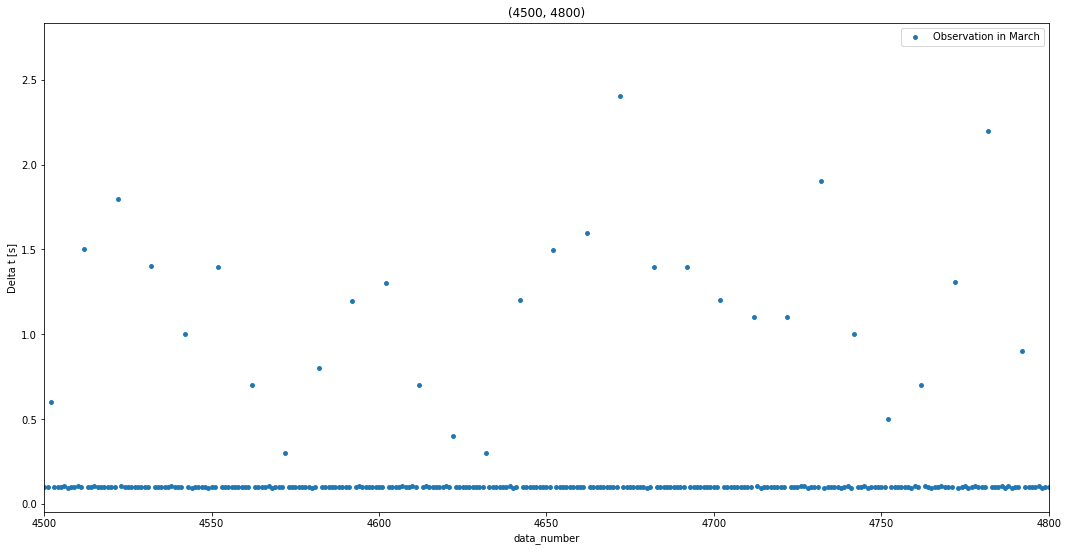

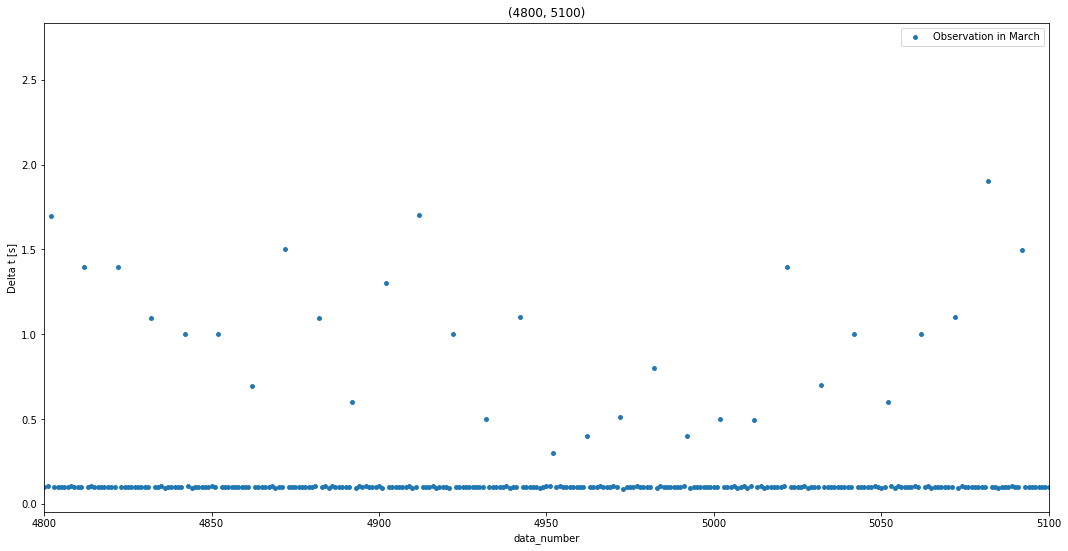

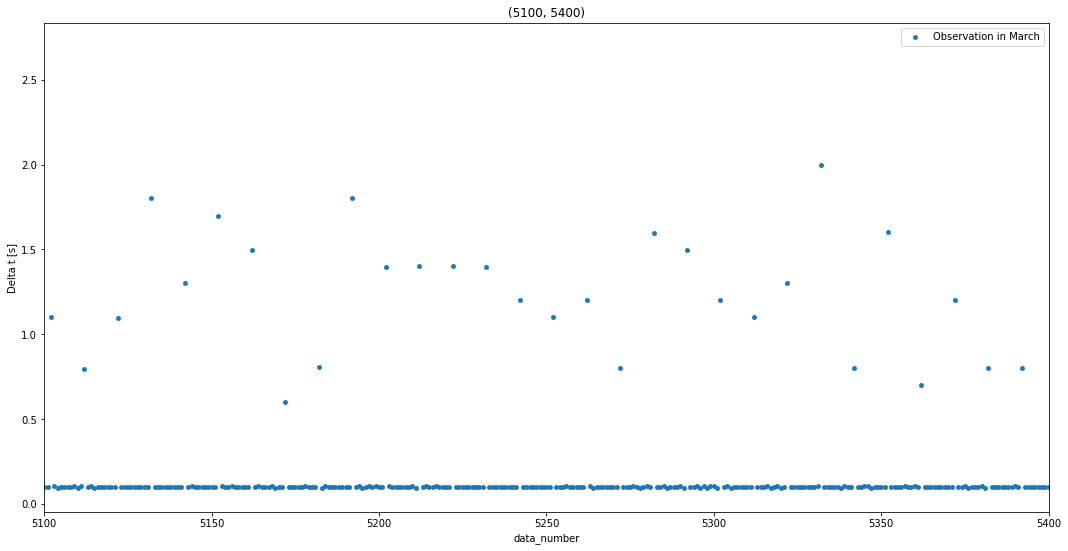

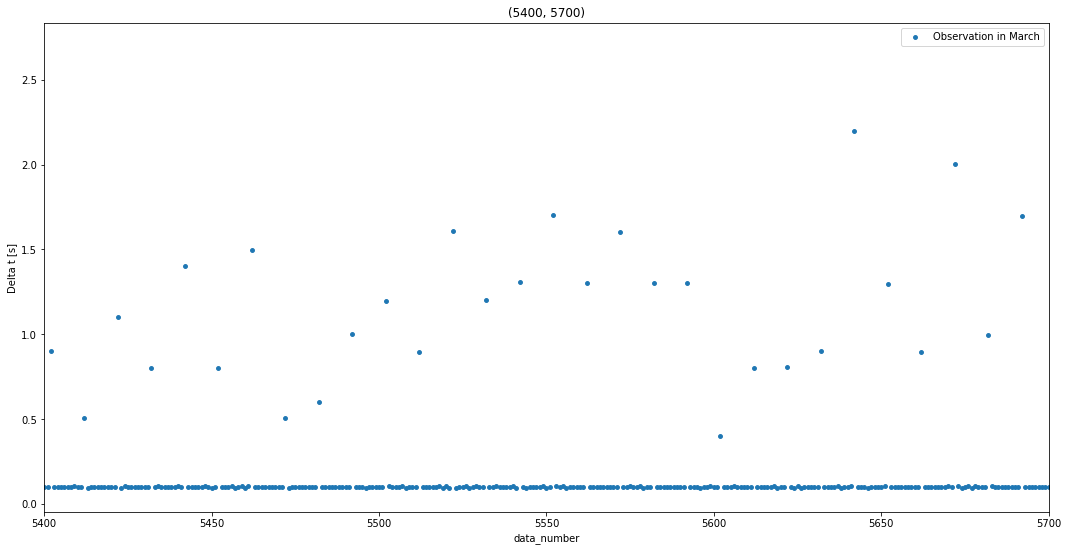

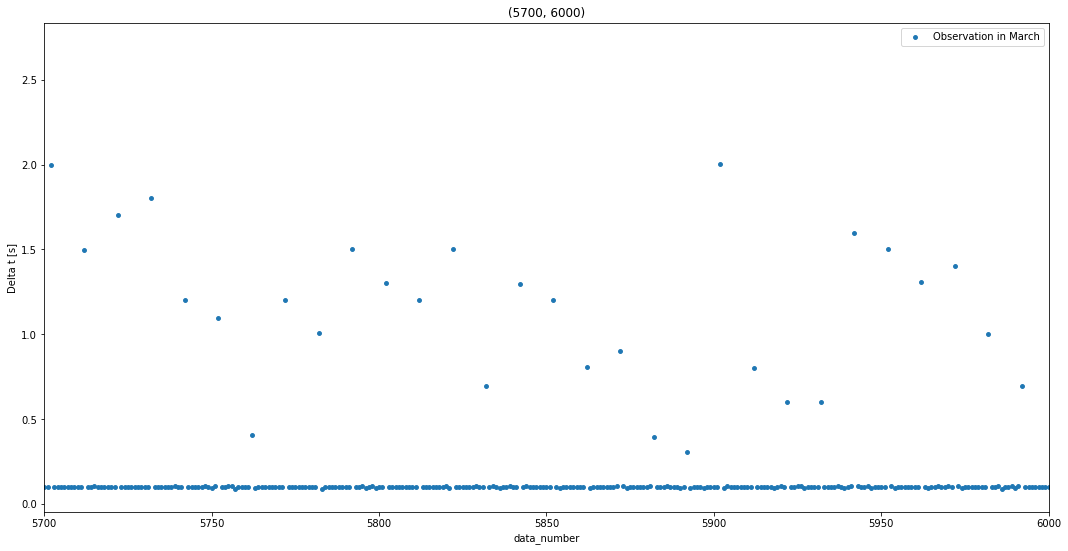

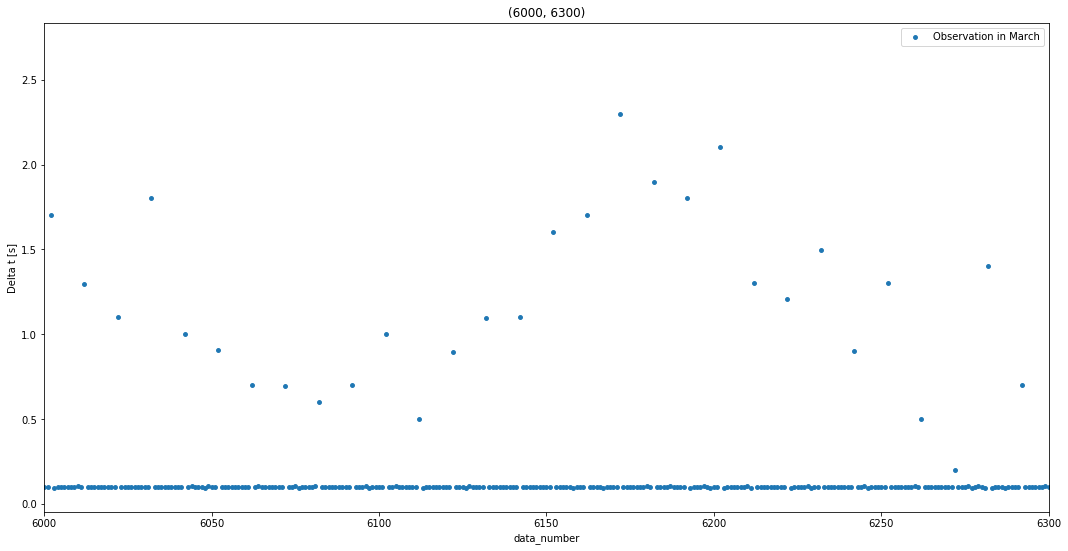

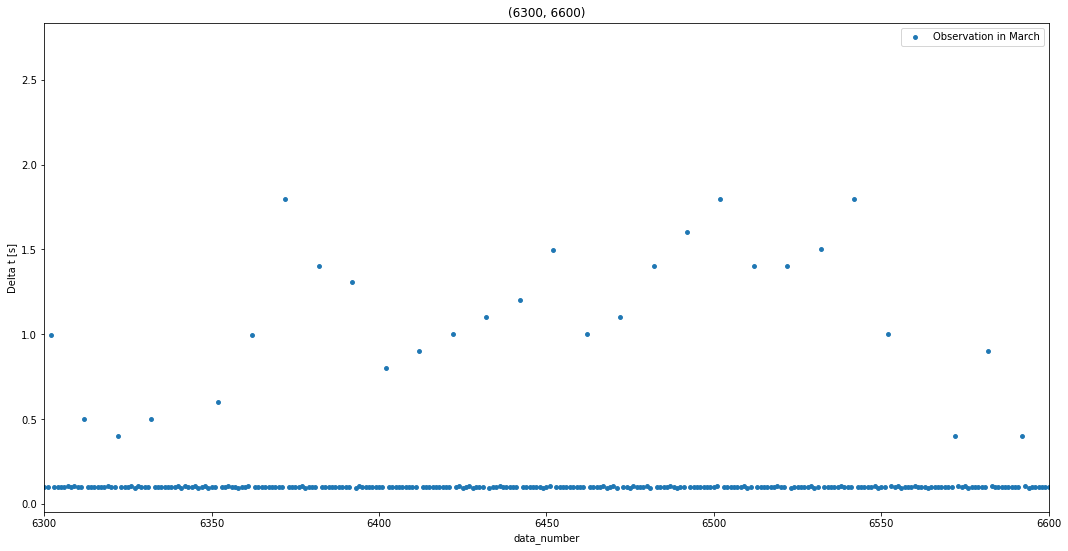

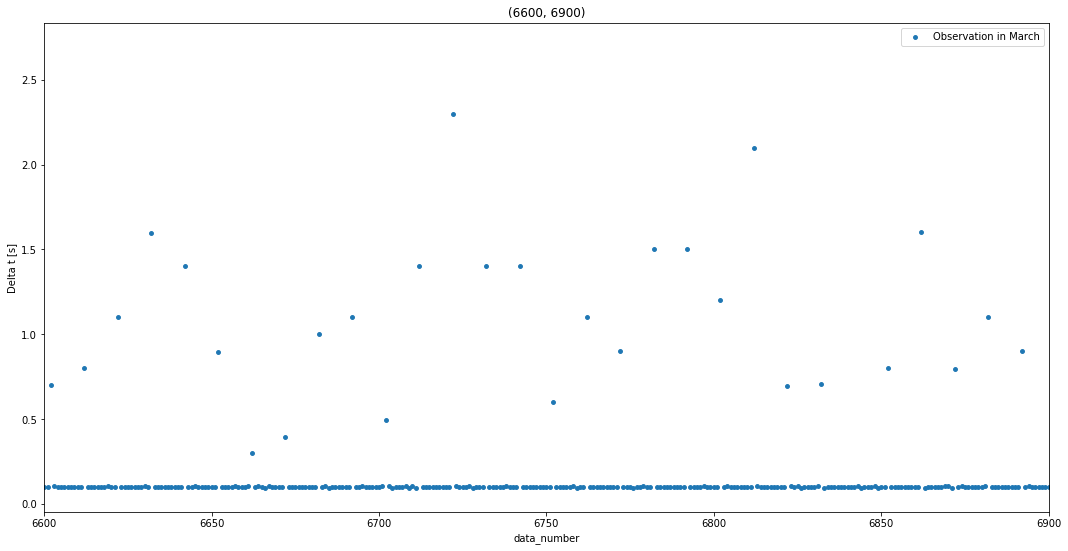

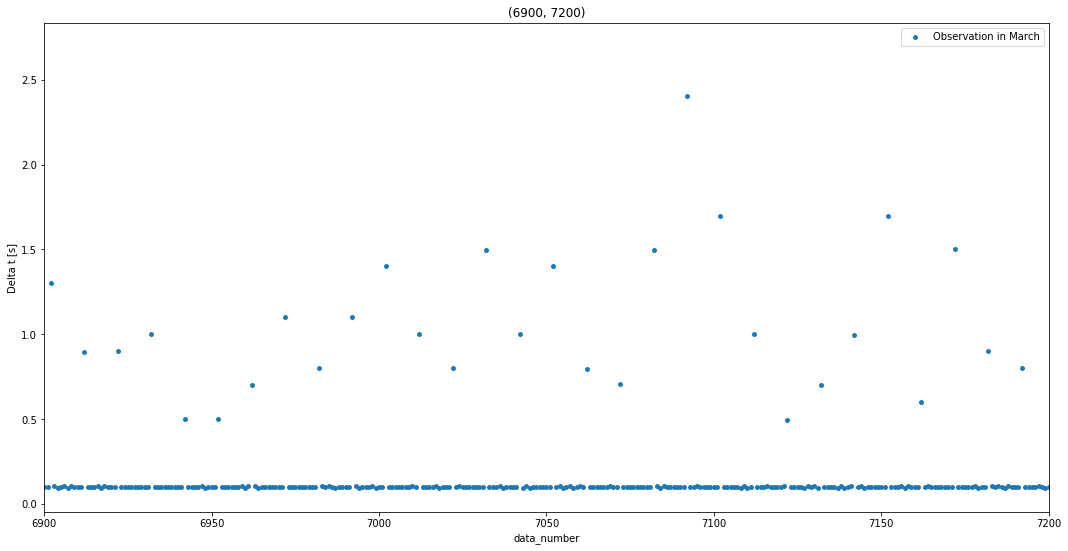

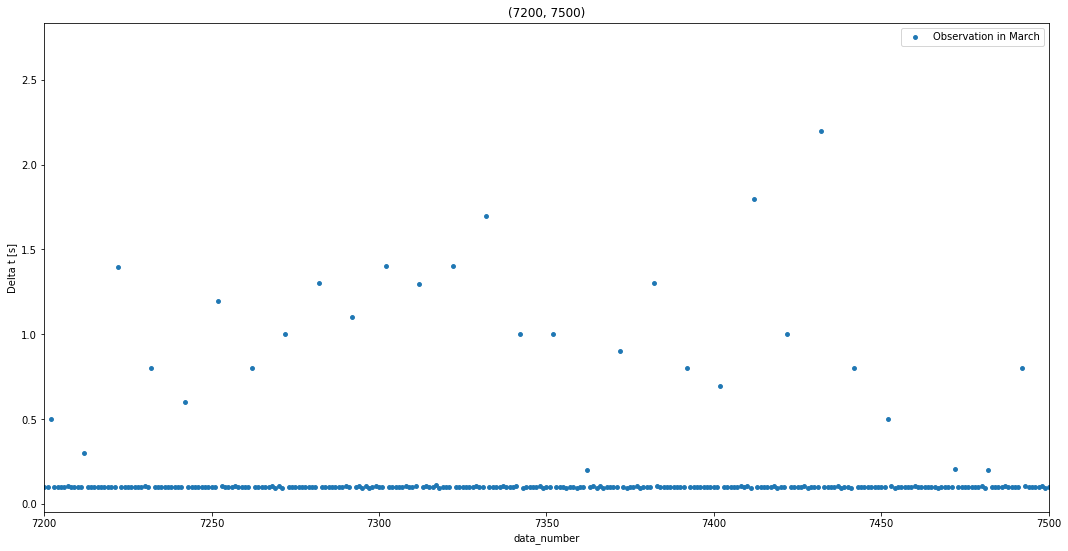

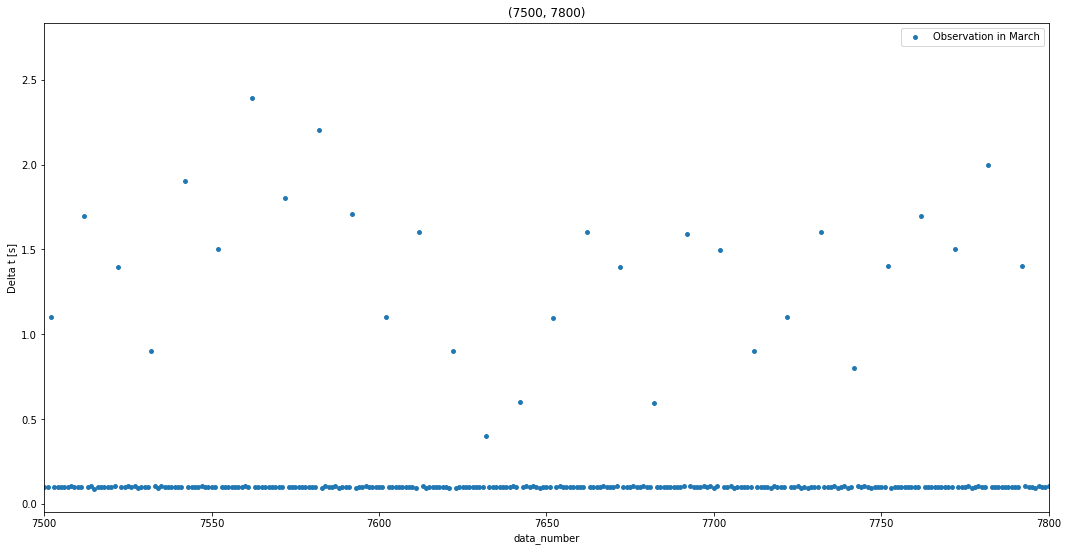

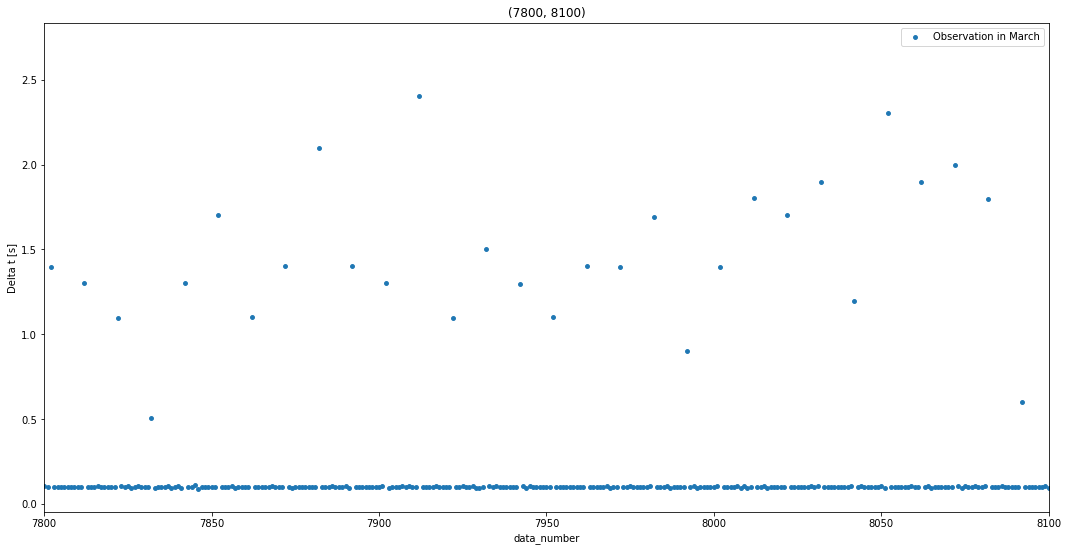

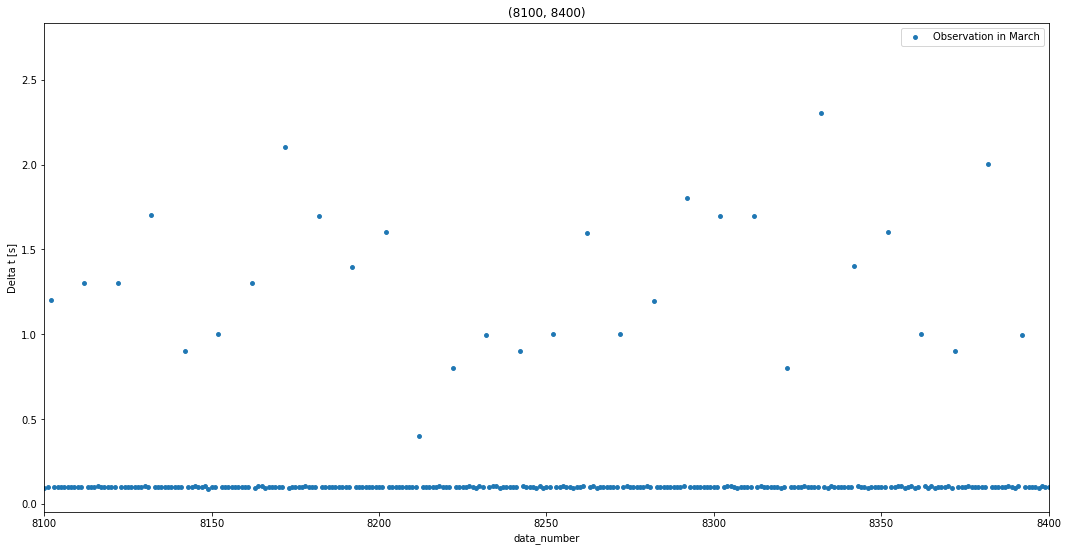

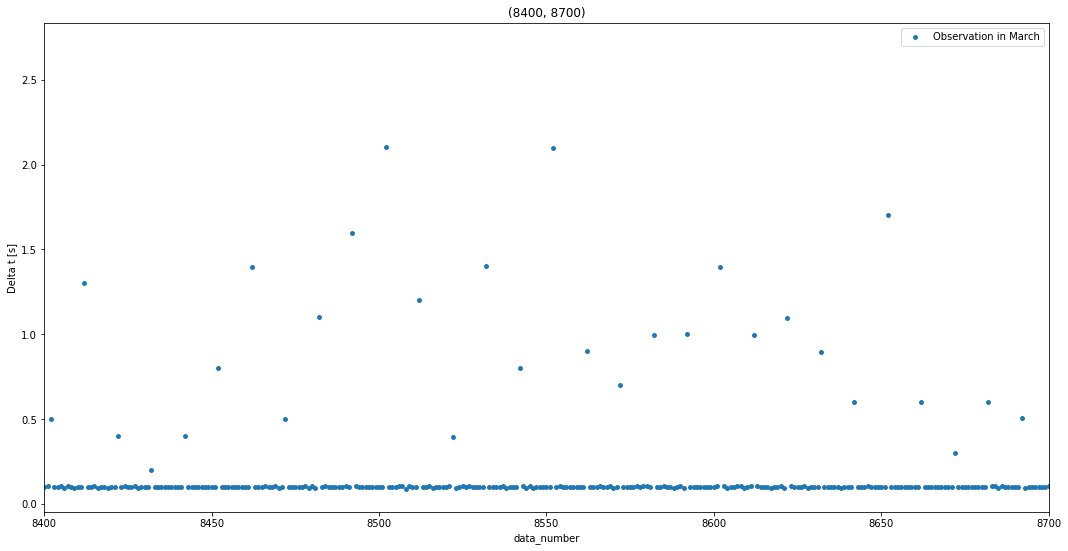

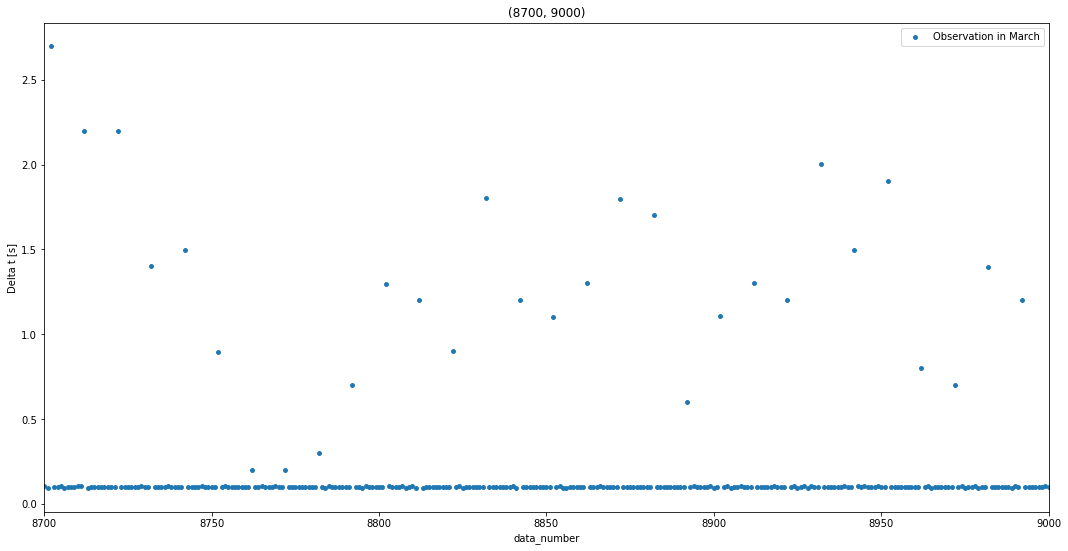

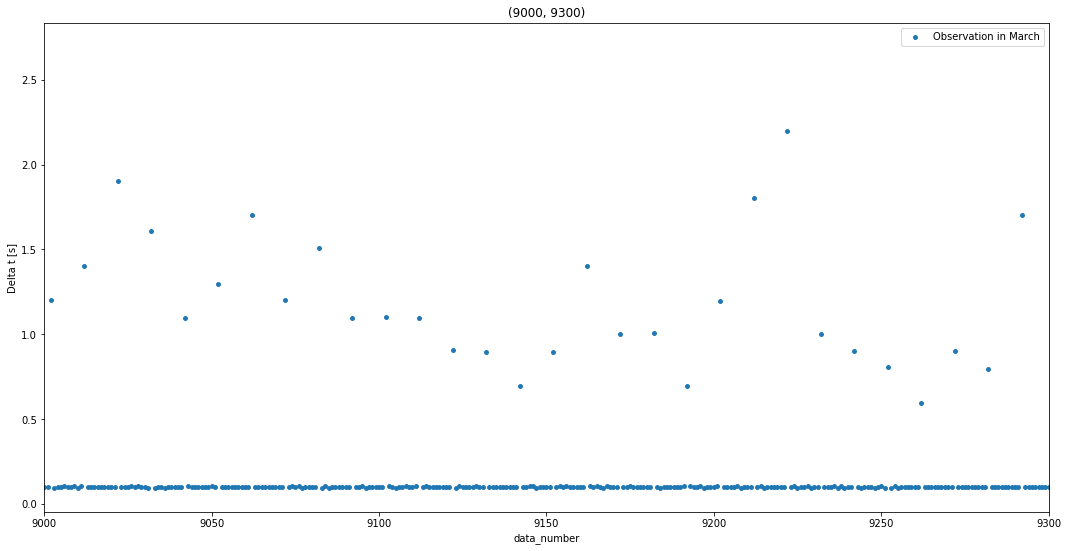

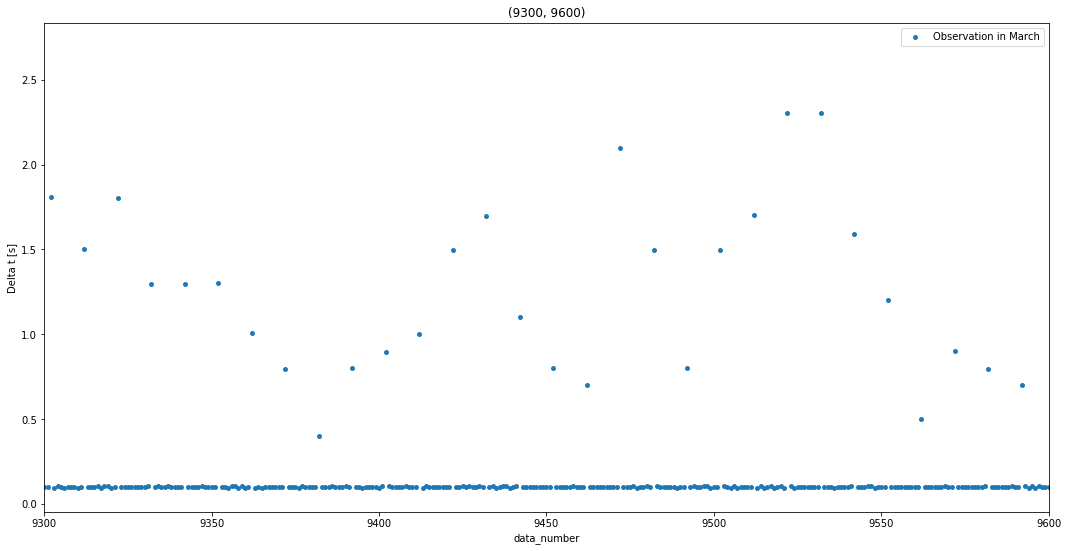

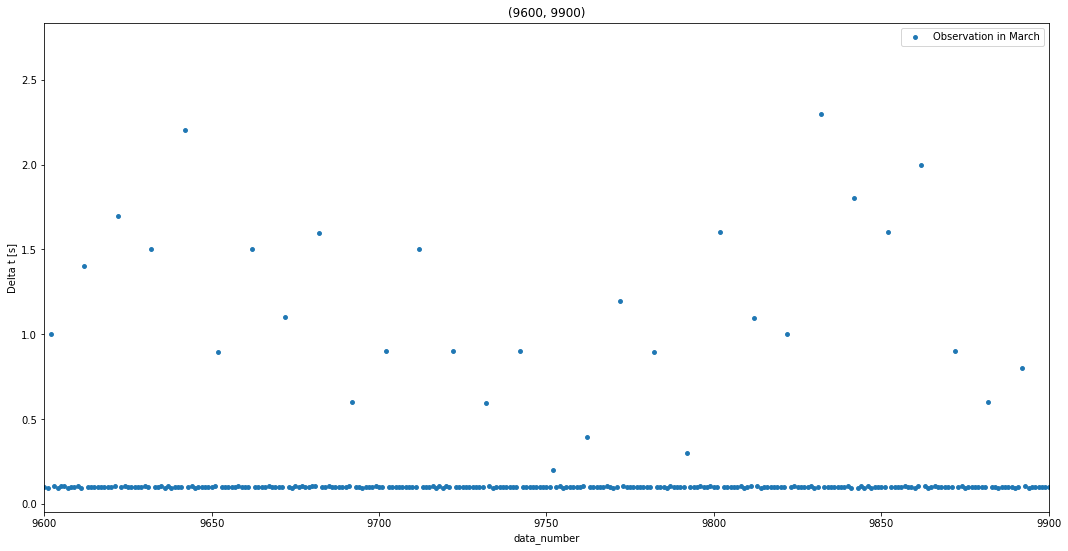

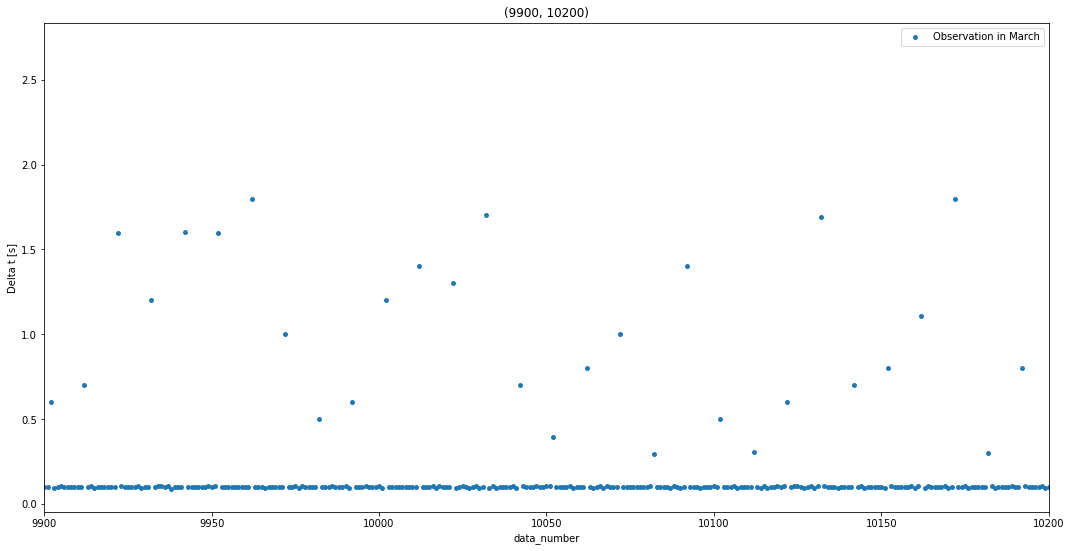

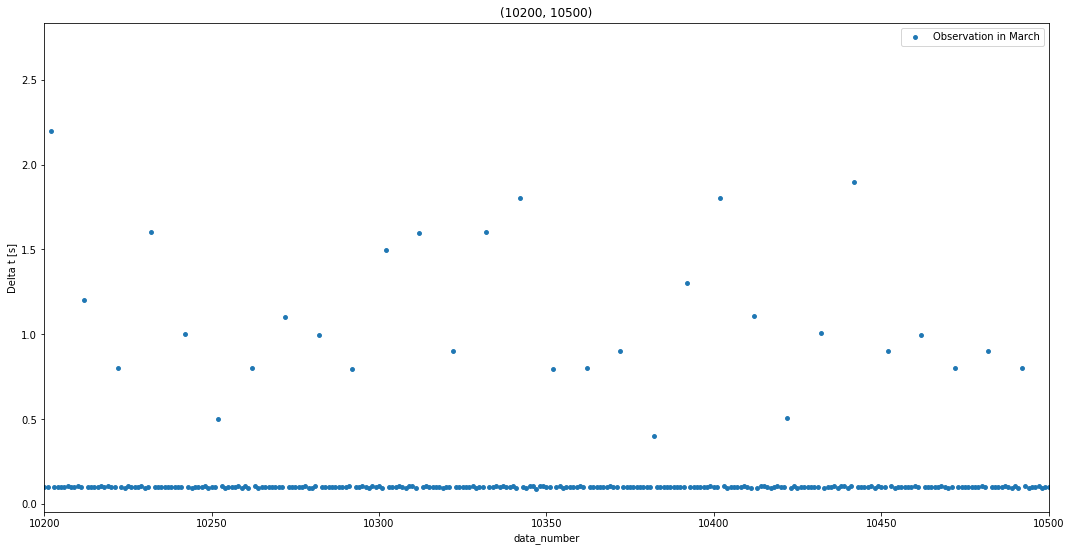

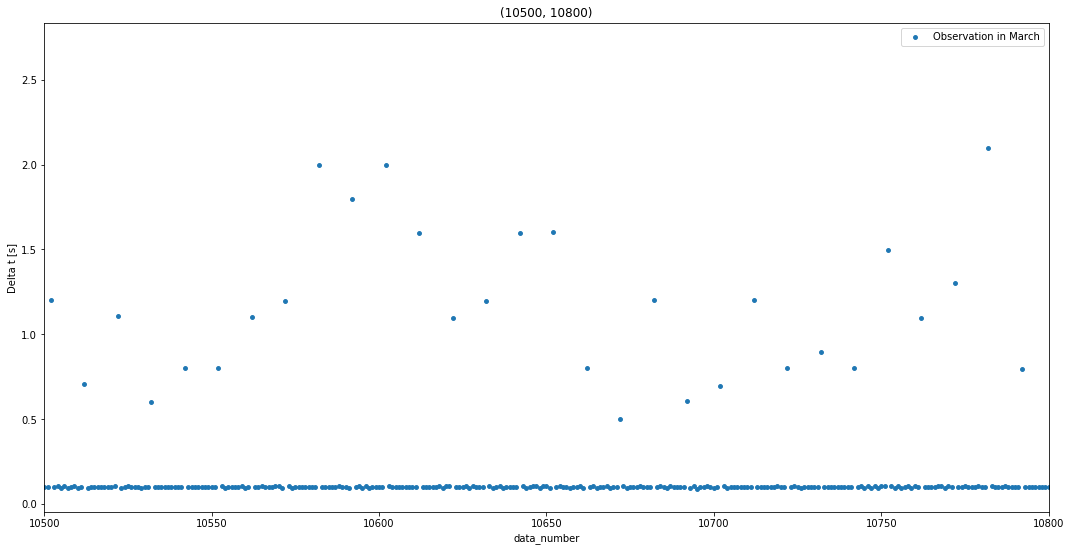

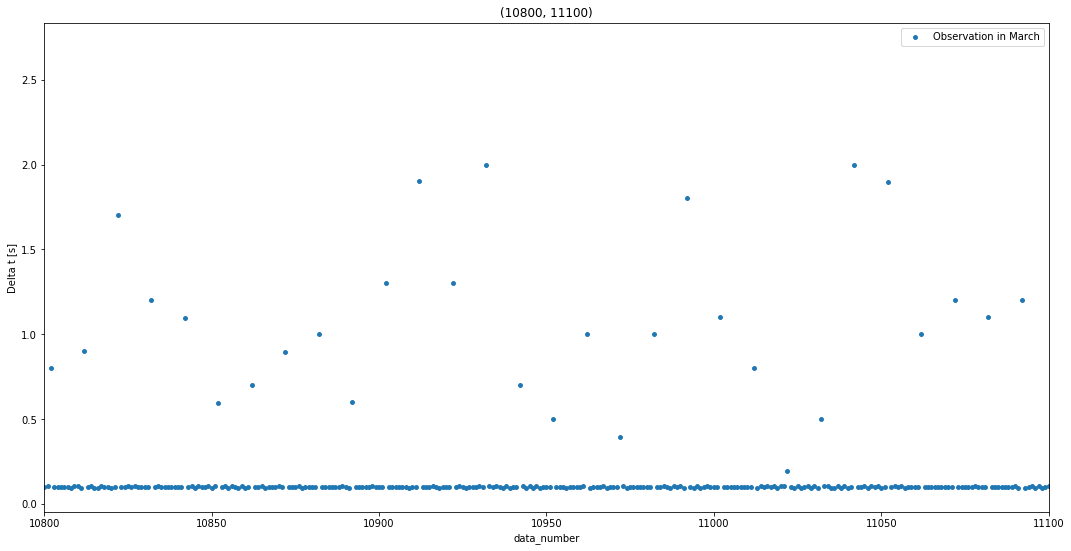

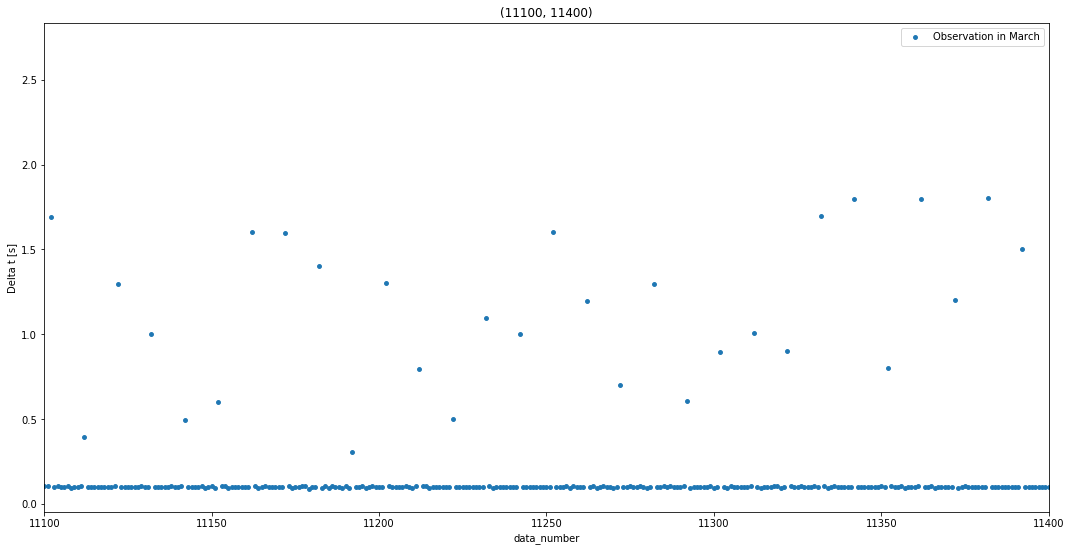

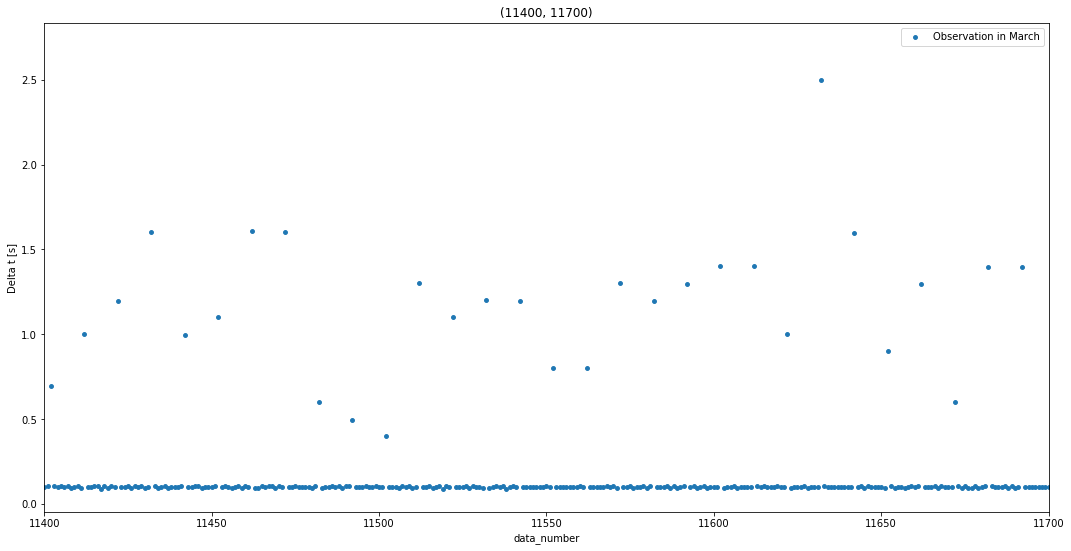

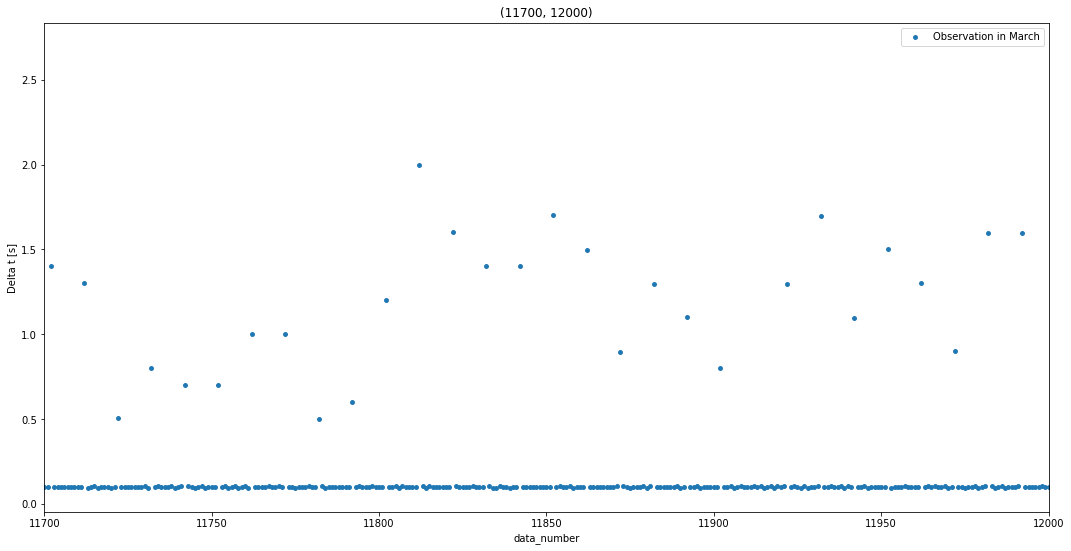

In [90]:
for i in range(int(len(delta_t)/300)):
    fig = plt.figure(figsize = (18,9))
    ax = fig.add_subplot(111)
    ax.scatter(np.arange(len(delta_t)),delta_t, s=15, label='Observation in March')
    ax.set_xlabel('data_number')
    ax.set_ylabel('Delta t [s]')
    ax.set_title(f'{i*300,(i+1)*300}')
    ax.set_xlim(i*300,(i+1)*300)
    ax.legend()
    
#fig.savefig(f'/home/amigos/seigyo/analy/notebook_2020/Nishioka/delta_t_png/delta_t_number{i}.png')

In [91]:
xFFTS_Data_topics = [
    
    'xffts_board01',
    'xffts_board02',
    'xffts_board03',
    'xffts_board04',
    'xffts_board05',
    'xffts_board06',
    'xffts_board07',
    'xffts_board08',
    'xffts_board09',
    'xffts_board10',
    'xffts_board11',
    'xffts_board12',
    'xffts_board13',
    'xffts_board14',
    'xffts_board15',
    'xffts_board16'
    
]

In [93]:
def get_array(path, xFFTS_Data_topics):
    db = necstdb.opendb(path)
    xFFTS_data = db.open_table('xffts_board01').read(astype='array')
    obsmode =  db.open_table('obsmode').read(astype='array')
    enc =  db.open_table('status_encoder').read(astype='array')
    
    spec_array = xr.DataArray(

        xFFTS_data['spec'], 
        dims=['t', 'spectral_data'], 
        coords={'t':xFFTS_data['received_time']}
    )


    obsmode_array = xr.DataArray(

        obsmode['obs_mode'],
        dims = ['t'],
        coords={'t':obsmode['received_time'], 'scan_num':('t', obsmode['scan_num'])}


    )
    
    az_array = xr.DataArray(
        
        enc['enc_az']/3600, 
        dims=['t'],
        coords={'t':enc['timestamp']}
    )
    
    el_array = xr.DataArray(
        
        enc['enc_el']/3600, 
        dims=['t'],
        coords={'t':enc['timestamp']}
    )

    return spec_array, obsmode_array, az_array, el_array

def concatenate(spec_array, obsmode_array, az_array, el_array):
    
    reindexed_obsmode_array = obsmode_array.reindex(t=spec_array['t'], method='backfill')
    reindexed_encoder_az_array = az_array.interp_like(spec_array)
    reindexed_encoder_el_array = el_array.interp_like(spec_array)
    
    del obsmode_array
    del az_array
    del el_array
    raw_array = xr.DataArray(
        np.array(spec_array),
        dims=['t', 'spectral_data'],
        coords={'t':spec_array['t'],
                
               'obsmode':('t',np.array(reindexed_obsmode_array)),
               'scan_num':('t', np.array(reindexed_obsmode_array['scan_num'])),
               'azlist':('t', np.array(reindexed_encoder_az_array)),
               'ellist':('t', np.array(reindexed_encoder_el_array))
                
               }
    )
    
    return raw_array

In [94]:
spec_array, obsmode_array, az_array, el_array = get_array(path, xFFTS_Data_topics[0])
raw_array = concatenate(spec_array, obsmode_array, az_array, el_array)

In [96]:
np.unique(raw_array['obsmode'])

array([b'HOT       ', b'Non       ', b'OFF       ', b'ON        '],
      dtype='|S12')

In [249]:
HOT_OL = raw_array['obsmode'] == b'HOT       '   
OFF_OL = raw_array['obsmode'] == b'OFF       '
ON_OL = raw_array['obsmode'] == b'ON        '

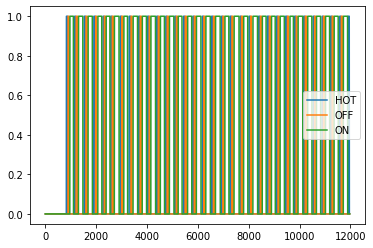

In [250]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(HOT_OL , label = 'HOT')
ax.plot(OFF_OL , label = 'OFF')
ax.plot(ON_OL , label = 'ON')
#ax.set_xlim(2000,4000)
ax.legend()

In [251]:
raw_array.coords

Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'Non       ' b'Non       ' ... b'Non       '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    azlist    (t) float64 48.79 48.79 48.79 48.79 ... -100.7 -100.7 -100.7
    ellist    (t) float64 55.08 55.08 55.08 55.08 ... 38.72 38.72 38.72 38.72

In [252]:
raw_array

<xarray.DataArray (t: 11969, spectral_data: 32768)>
array([[1.3331994e+10, 1.3331994e+10, 1.3331994e+10, ..., 2.0998969e+12,
        2.1448508e+12, 2.1401759e+12],
       [1.2770736e+10, 1.2770736e+10, 1.2770736e+10, ..., 2.1020802e+12,
        2.1157058e+12, 2.1500976e+12],
       [1.3069799e+10, 1.3069799e+10, 1.3069799e+10, ..., 2.1728091e+12,
        2.1053660e+12, 2.1870209e+12],
       ...,
       [6.2955512e+10, 6.2955512e+10, 6.2955512e+10, ..., 3.0232929e+12,
        3.0492289e+12, 3.1200245e+12],
       [6.3783485e+10, 6.3783485e+10, 6.3783485e+10, ..., 2.9485595e+12,
        3.0412159e+12, 3.0624642e+12],
       [6.2649385e+10, 6.2649385e+10, 6.2649385e+10, ..., 3.0502840e+12,
        3.0190351e+12, 3.0072195e+12]], dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'Non       ' b'Non       ' ... b'Non       '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    azlist    (t) float64 48.79 48.79 48.79 48.79 ... -100.7 -100.7 -100.7
    ellist    (t) float64 55.08 55.08 55.08 55.08 ... 38.72 38.72 38.72 38.72
Dimensions without coordinates: spectral_data

- エンコーダーとxFFTSのタイムスタンプの抱き合わせ完了
- 今後はデータの切り離し、HOTとOFFは平均値を求める=>チョッパーホイール法

In [254]:
print(HOT_OL)

<xarray.DataArray 'obsmode' (t: 11969)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'Non       ' b'Non       ' ... b'Non       '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    azlist    (t) float64 48.79 48.79 48.79 48.79 ... -100.7 -100.7 -100.7
    ellist    (t) float64 55.08 55.08 55.08 55.08 ... 38.72 38.72 38.72 38.72


In [255]:
HOT = raw_array[HOT_OL]
ON = raw_array[ON_OL]
OFF = raw_array[OFF_OL]

In [256]:
HOT

<xarray.DataArray (t: 1526, spectral_data: 32768)>
array([[7.0229197e+10, 7.0229197e+10, 7.0229197e+10, ..., 3.0367587e+12,
        3.0871391e+12, 3.0967024e+12],
       [7.2860369e+10, 7.2860369e+10, 7.2860369e+10, ..., 3.0771160e+12,
        3.0408547e+12, 3.1007029e+12],
       [7.1445406e+10, 7.1445406e+10, 7.1445406e+10, ..., 3.1446296e+12,
        3.1368117e+12, 3.1678160e+12],
       ...,
       [5.7951642e+10, 5.7951642e+10, 5.7951642e+10, ..., 3.0313100e+12,
        2.9475962e+12, 3.0063418e+12],
       [5.9733311e+10, 5.9733311e+10, 5.9733311e+10, ..., 3.0531846e+12,
        3.0365151e+12, 3.0614844e+12],
       [5.8147963e+10, 5.8147963e+10, 5.8147963e+10, ..., 2.9623009e+12,
        3.0173836e+12, 3.0251363e+12]], dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'HOT       ' b'HOT       ' ... b'HOT       '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 31.0 31.0 31.0 31.0 31.0
    azlist    (t) float64 -97.31 -97.31 -97.31 -97.31 ... -100.7 -100.7 -100.7
    ellist    (t) float64 48.38 48.38 48.38 48.38 ... 38.72 38.72 38.72 38.72
Dimensions without coordinates: spectral_data

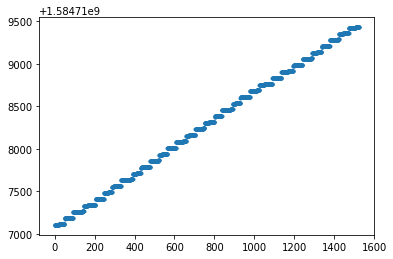

In [257]:
plt.plot(HOT['t'],'.')

In [258]:
hot_av = np.mean(HOT,axis=0)

In [259]:
hot_av

<xarray.DataArray (spectral_data: 32768)>
array([6.5902612e+10, 6.5902612e+10, 6.5902612e+10, ..., 3.0131820e+12,
       3.0157507e+12, 3.0278848e+12], dtype=float32)
Dimensions without coordinates: spectral_data

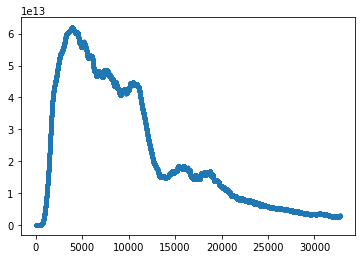

In [260]:
plt.plot(hot_av,'.')

In [261]:
off_av = np.mean(OFF,axis=0)

In [262]:
off_av

<xarray.DataArray (spectral_data: 32768)>
array([1.3172919e+10, 1.3172919e+10, 1.3172919e+10, ..., 2.1323704e+12,
       2.1357901e+12, 2.1451660e+12], dtype=float32)
Dimensions without coordinates: spectral_data

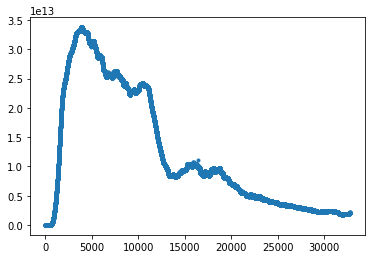

In [263]:
plt.plot(off_av,'.')

In [264]:
ON

<xarray.DataArray (t: 5103, spectral_data: 32768)>
array([[1.3110075e+10, 1.3110075e+10, 1.3110075e+10, ..., 2.1356916e+12,
        2.1310970e+12, 2.1559366e+12],
       [1.2960341e+10, 1.2960341e+10, 1.2960341e+10, ..., 2.1460900e+12,
        2.1293896e+12, 2.1275464e+12],
       [1.3024867e+10, 1.3024867e+10, 1.3024867e+10, ..., 2.1608112e+12,
        2.0973845e+12, 2.1640270e+12],
       ...,
       [1.2988529e+10, 1.2988529e+10, 1.2988529e+10, ..., 2.1348496e+12,
        2.1780415e+12, 2.1889994e+12],
       [1.2891125e+10, 1.2891125e+10, 1.2891125e+10, ..., 2.1442795e+12,
        2.1651486e+12, 2.1469110e+12],
       [1.3118890e+10, 1.3118890e+10, 1.3118890e+10, ..., 2.1449426e+12,
        2.1171588e+12, 2.1660594e+12]], dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 30.0 30.0 30.0 30.0 30.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -100.7 -100.7 -100.7
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 38.72 38.72 38.72 38.72
Dimensions without coordinates: spectral_data

In [265]:
def chopper_wheel(ON, off_av, hot_av):
    ON_acw = ((ON-off_av)/(hot_av-off_av))*300
    
    return ON_acw

In [266]:
ON_acw = chopper_wheel(ON, off_av, hot_av)

In [267]:
ON_acw

<xarray.DataArray (t: 5103, spectral_data: 32768)>
array([[ -0.35754374,  -0.35754374,  -0.35754374, ...,   1.1311954 ,
         -1.5999691 ,   3.660479  ],
       [ -1.2094417 ,  -1.2094417 ,  -1.2094417 , ...,   4.672816  ,
         -2.1820889 ,  -5.9881864 ],
       [ -0.84232605,  -0.84232605,  -0.84232605, ...,   9.68679   ,
        -13.093382  ,   6.410082  ],
       ...,
       [ -1.0490711 ,  -1.0490711 ,  -1.0490711 , ...,   0.8444122 ,
         14.404549  ,  14.897165  ],
       [ -1.6032403 ,  -1.6032403 ,  -1.6032403 , ...,   4.0561695 ,
         10.009047  ,   0.593041  ],
       [ -0.30739403,  -0.30739403,  -0.30739403, ...,   4.282016  ,
         -6.3518395 ,   7.100812  ]], dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 30.0 30.0 30.0 30.0 30.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -100.7 -100.7 -100.7
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 38.72 38.72 38.72 38.72
Dimensions without coordinates: spectral_data

## Chopper Wheel
今回用いたチョッパーホイールの式は
$$ T^*_{\rm A}=T_{\rm amb}\frac{P_\nu({\rm on})-P_\nu({\rm off})}{P_\nu({\rm hot})-P_\nu({\rm off})} $$
である。
___

## ビームパターンの導出
ビームパターン$P_{\rm n}(\theta,\phi)$を持つアンテナを$(\theta_0,\phi_0)$の方向に向けた時の受信電力は、輝度分布を$B_\nu(\theta,\phi)$とすると
$$ W_\nu(\theta_0,\phi_0)=\int_{4\pi}P_{\rm n}(\theta-\theta_0,\phi-\phi_0)B_\nu(\theta,\phi)d\Omega$$
の様に輝度分布とビームパターンの畳み込みで表せる。

電力アンテナパターン$P_{\rm n}(\theta,\phi)$を持つアンテナが$(\theta,\phi)=(0,0)$にある点源$B_{\nu0}$を観測した時、
$$W_\nu(\theta_0,\phi_0)=\int_{4\pi}P_{\rm n}(\theta-\theta_0,\phi-\phi_0)B_{\nu0}\delta(\theta,\phi)d\Omega$$

$$=B_{\nu0}P_{\rm n}(-\theta_0,-\phi_0)$$
___

一旦マッピングを行う

In [268]:
on_av = np.mean(ON,axis=0)

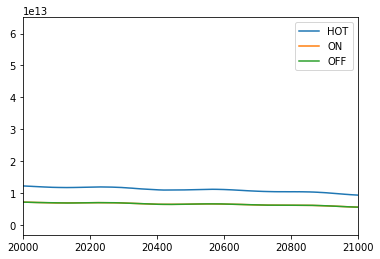

In [269]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(hot_av , label = 'HOT')
ax.plot(off_av , label = 'ON')
ax.plot(on_av , label = 'OFF')
ax.set_xlim(20000,21000)
ax.legend()

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


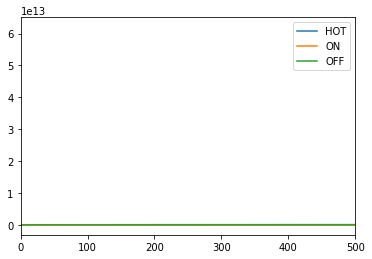

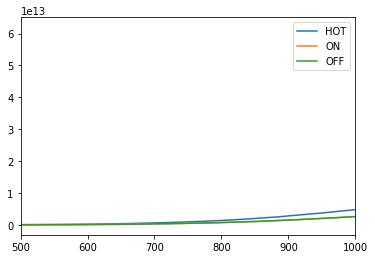

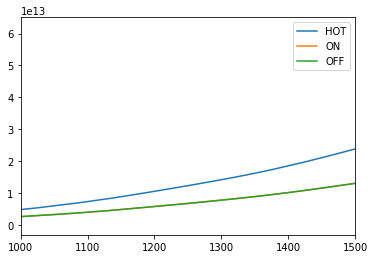

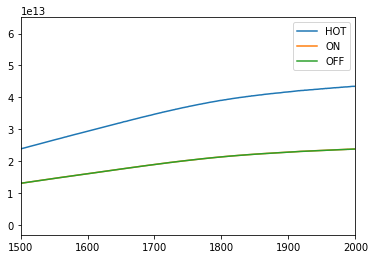

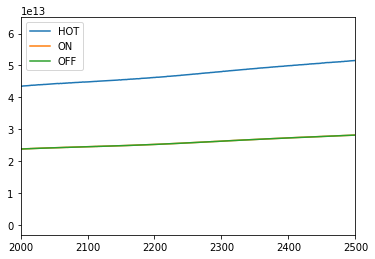

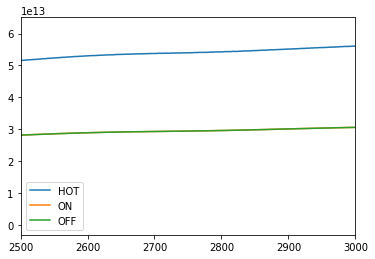

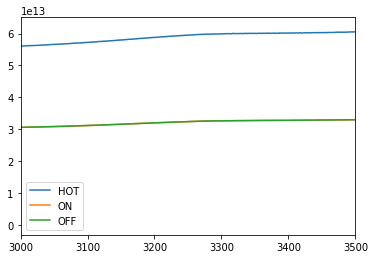

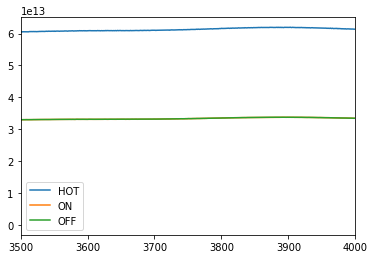

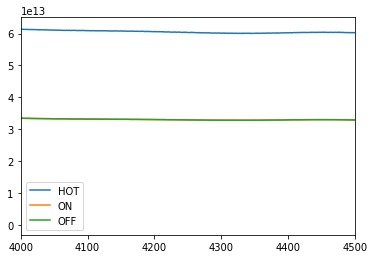

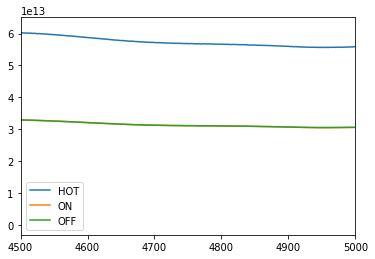

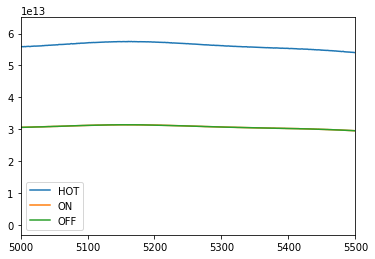

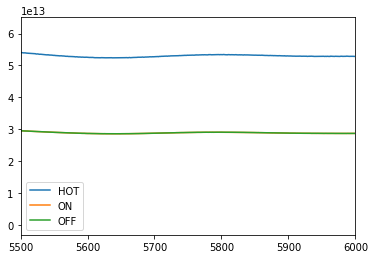

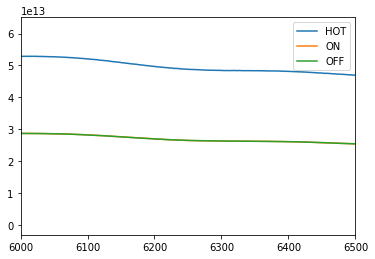

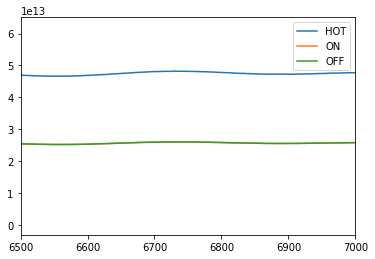

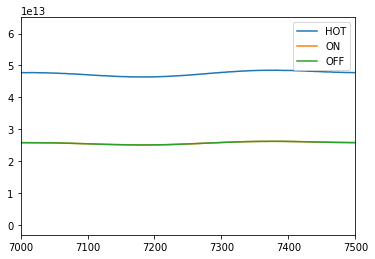

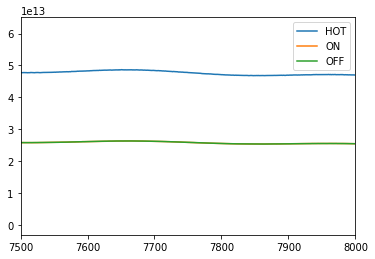

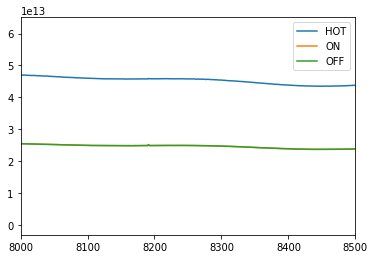

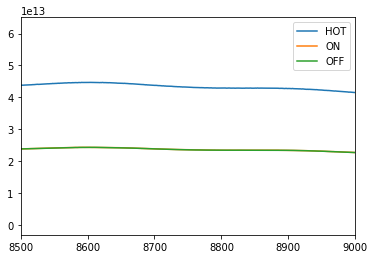

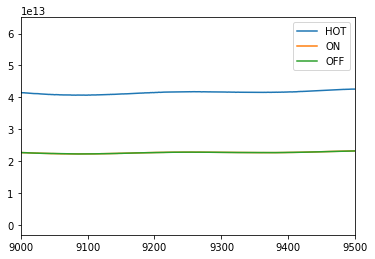

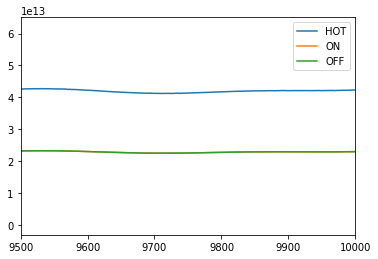

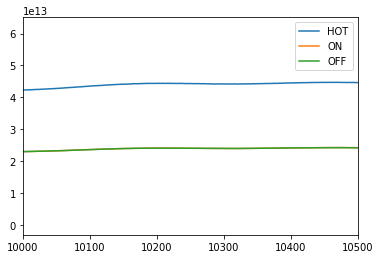

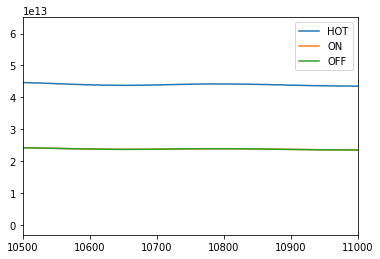

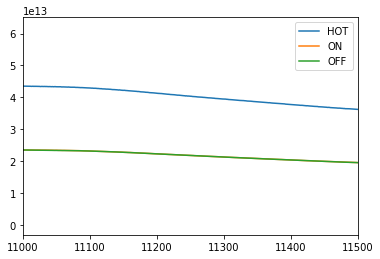

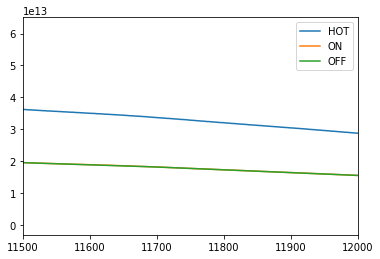

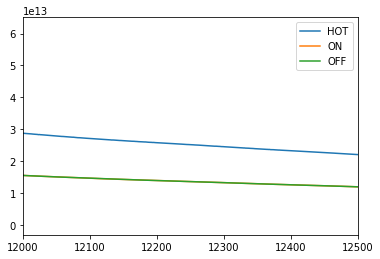

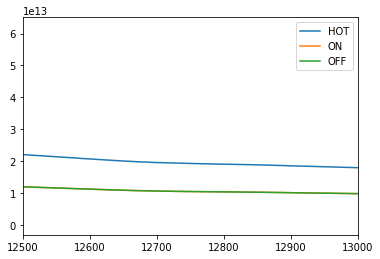

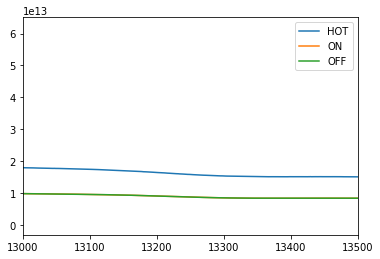

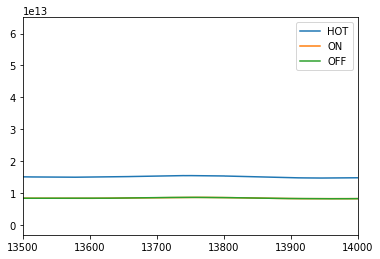

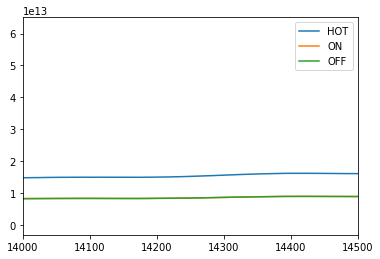

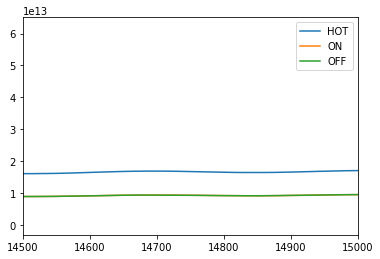

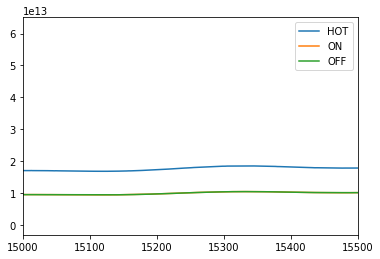

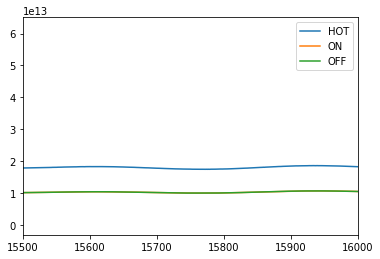

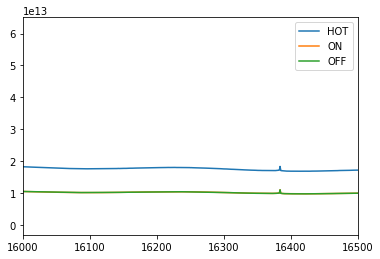

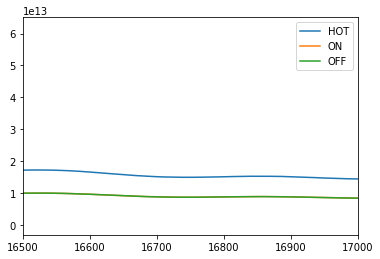

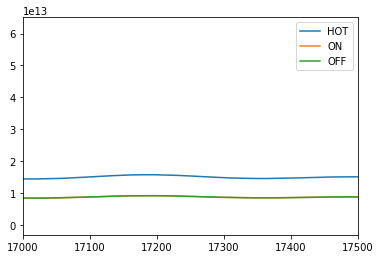

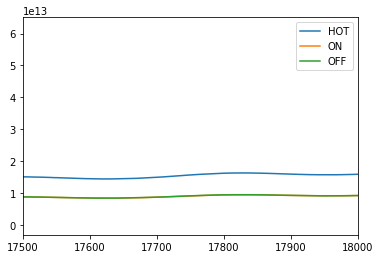

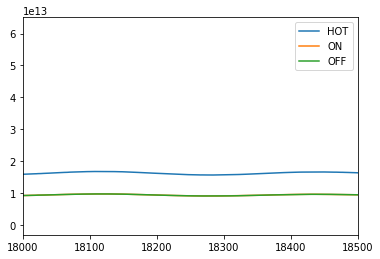

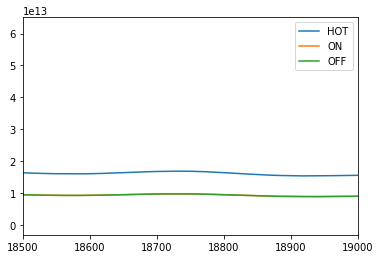

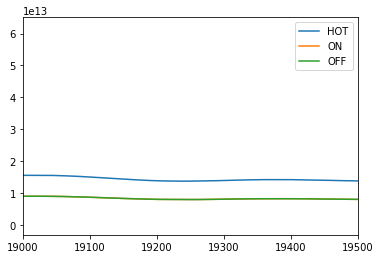

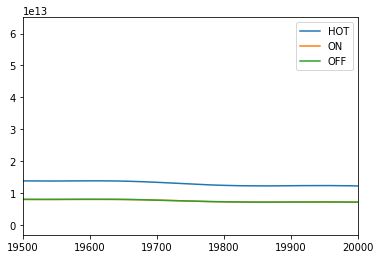

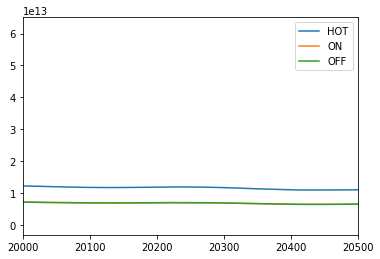

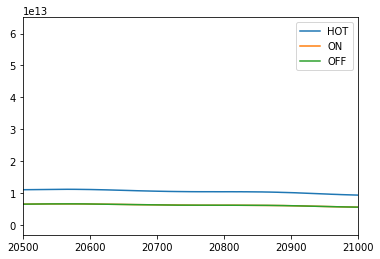

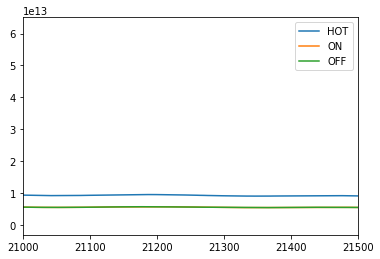

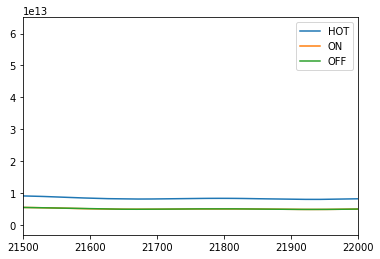

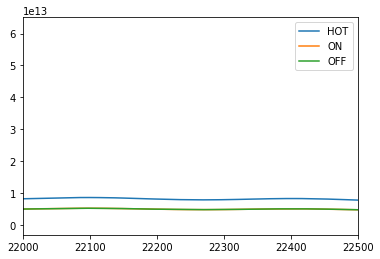

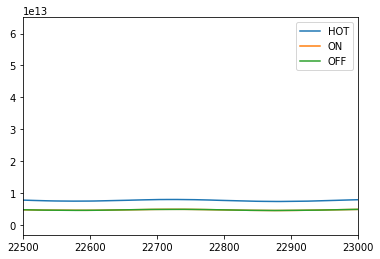

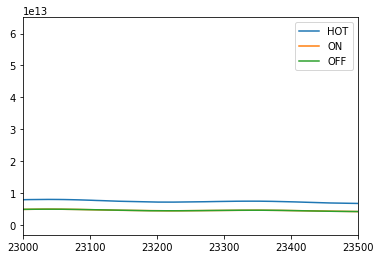

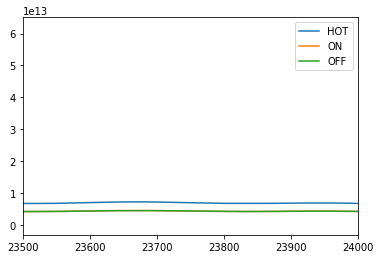

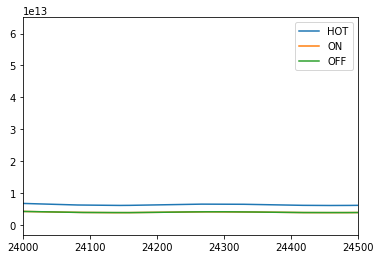

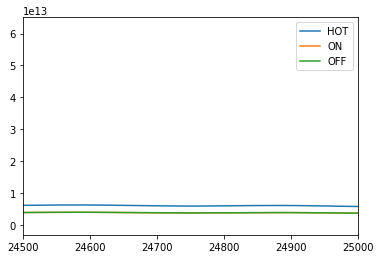

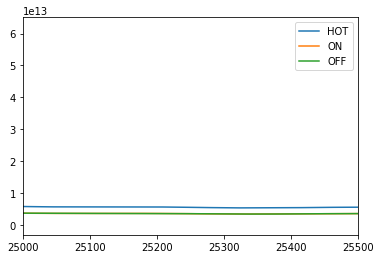

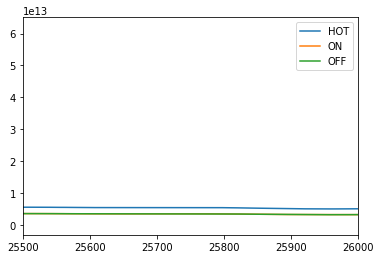

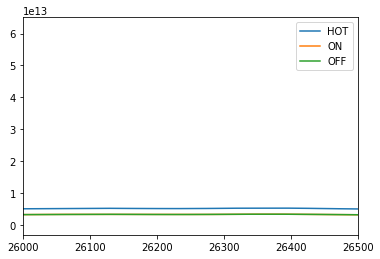

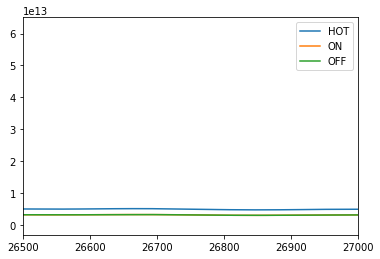

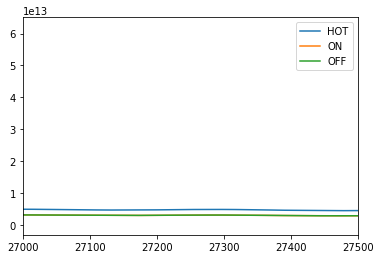

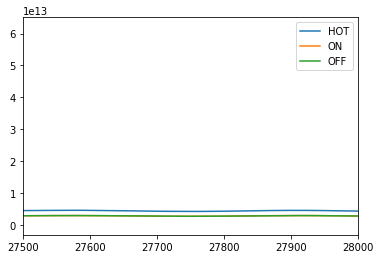

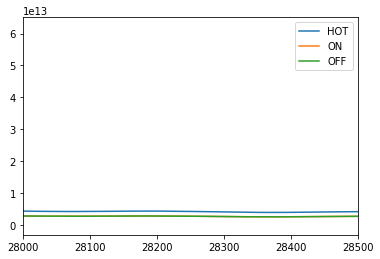

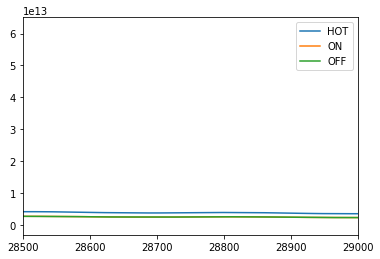

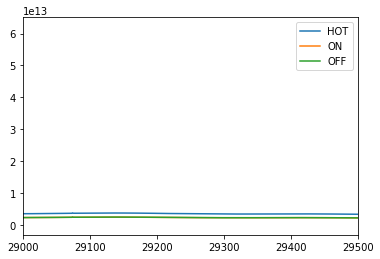

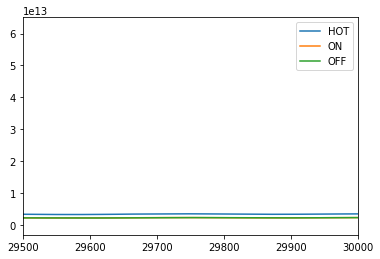

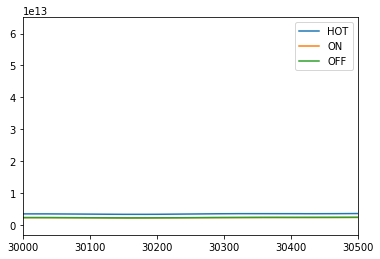

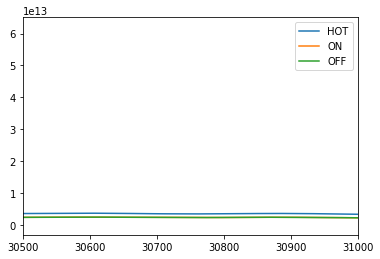

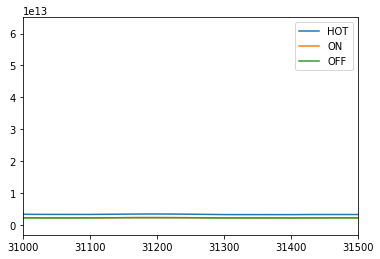

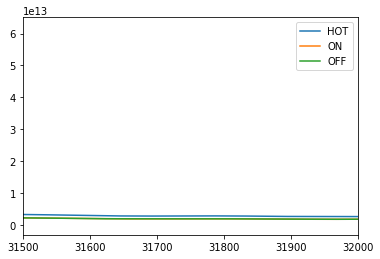

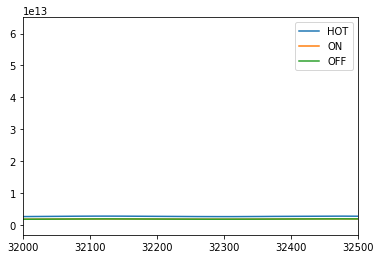

In [270]:
for i in range(int(len(on_ave['spectral_data'])/500)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(hot_av , label = 'HOT')
    ax.plot(off_av , label = 'ON')
    ax.plot(on_av , label = 'OFF')
    ax.set_xlim(i*500,(i+1)*500)
    ax.legend()

In [271]:
ON_acw

<xarray.DataArray (t: 5103, spectral_data: 32768)>
array([[ -0.35754374,  -0.35754374,  -0.35754374, ...,   1.1311954 ,
         -1.5999691 ,   3.660479  ],
       [ -1.2094417 ,  -1.2094417 ,  -1.2094417 , ...,   4.672816  ,
         -2.1820889 ,  -5.9881864 ],
       [ -0.84232605,  -0.84232605,  -0.84232605, ...,   9.68679   ,
        -13.093382  ,   6.410082  ],
       ...,
       [ -1.0490711 ,  -1.0490711 ,  -1.0490711 , ...,   0.8444122 ,
         14.404549  ,  14.897165  ],
       [ -1.6032403 ,  -1.6032403 ,  -1.6032403 , ...,   4.0561695 ,
         10.009047  ,   0.593041  ],
       [ -0.30739403,  -0.30739403,  -0.30739403, ...,   4.282016  ,
         -6.3518395 ,   7.100812  ]], dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 30.0 30.0 30.0 30.0 30.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -100.7 -100.7 -100.7
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 38.72 38.72 38.72 38.72
Dimensions without coordinates: spectral_data

In [272]:
ON_acw_av = np.mean(ON_acw,axis=0)

In [273]:
ON_acw_av

<xarray.DataArray (spectral_data: 32768)>
array([-0.57037205, -0.57037205, -0.57037205, ...,  0.28201663,
        0.4436948 ,  0.20120567], dtype=float32)
Dimensions without coordinates: spectral_data

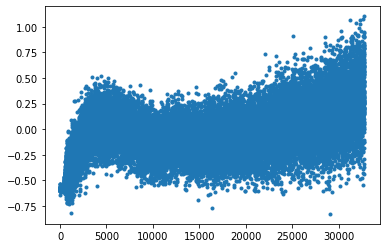

In [274]:
plt.plot(ON_acw_av,'.')

No handles with labels found to put in legend.


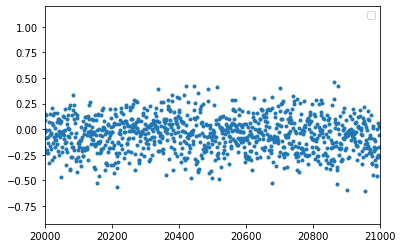

In [275]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ON_acw_av,'.')
ax.set_xlim(20000,21000)
ax.legend()

In [276]:
ON_TP = np.sum(ON_acw,axis=1)

In [277]:
ON_TP

<xarray.DataArray (t: 5103)>
array([ 18981.102  , -34947.156  ,  48083.64   , ..., 174420.3    ,
       109771.305  ,    508.66016], dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 30.0 30.0 30.0 30.0 30.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -100.7 -100.7 -100.7
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 38.72 38.72 38.72 38.72

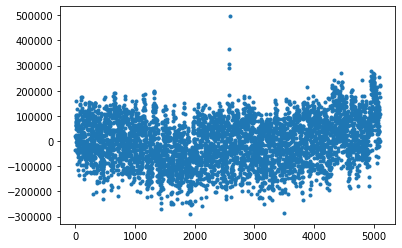

In [278]:
plt.plot(ON_TP,'.')

(-300000.0, 300000.0)

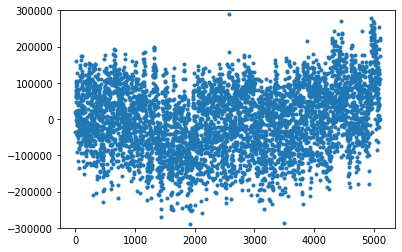

In [280]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ON_TP,'.')
ax.set_ylim(-0.03e7,0.03e7)

In [281]:
ON_TP

<xarray.DataArray (t: 5103)>
array([ 18981.102  , -34947.156  ,  48083.64   , ..., 174420.3    ,
       109771.305  ,    508.66016], dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 30.0 30.0 30.0 30.0 30.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -100.7 -100.7 -100.7
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 38.72 38.72 38.72 38.72

In [282]:
np.unique(ON_TP['scan_num'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.], dtype=float32)

In [286]:
ON_tp0 = ON_TP['scan_num'] == 0.

In [287]:
ON_TP0 = ON_TP[ON_tp0]

In [288]:
ON_TP0

<xarray.DataArray (t: 140)>
array([  18981.102 ,  -34947.156 ,   48083.64  ,   80684.17  ,
         64615.06  ,   62085.133 ,   64531.93  ,   77611.664 ,
         98758.34  ,  158907.1   ,  105530.14  ,   16551.379 ,
         91130.59  ,   16073.109 ,   22474.404 ,   -3173.9443,
         11782.064 ,   70402.445 ,  -36693.1   ,  -15059.011 ,
         56788.59  ,  126049.33  ,  103679.43  ,   82193.26  ,
         94196.055 ,   -7937.567 ,    9870.041 ,  -15049.148 ,
         -8183.426 ,    6115.05  ,  -44195.383 ,  -91824.7   ,
        -44546.656 ,    2060.6133,  101811.695 ,   -4478.6475,
         45179.082 ,    9246.982 ,   14245.6045,   45353.832 ,
        -11709.328 ,   18614.209 , -115375.016 ,  -52760.242 ,
         77388.13  ,  -61920.664 ,   69037.22  ,  104616.25  ,
         38338.617 ,   25735.68  ,  -32591.785 ,   10019.877 ,
          1160.3281,  -28022.543 ,    7355.9688,   -5161.839 ,
          8061.013 ,  -18072.998 ,  -40322.54  ,     908.5864,
        -41575.406 , -134421.34  ,  -19938.66  ,   22453.25  ,
         82530.95  ,  -11612.446 ,    8207.788 ,  -83757.61  ,
        -80217.64  ,   60841.07  ,  106896.89  ,  149417.62  ,
        117650.766 ,  118629.17  ,   47010.305 ,  -28891.803 ,
          6597.455 ,   20445.271 ,  -71642.8   ,    6780.133 ,
        -12694.129 ,  -10861.877 ,  -30317.584 ,   25325.041 ,
        141899.1   ,   47769.688 ,   59788.484 ,   53825.812 ,
        -26392.453 ,   20242.154 ,  -44629.77  ,  -43424.562 ,
        -69576.17  ,   37287.92  ,  163791.62  ,  175181.61  ,
        119908.55  ,    1317.5469,  -94909.516 ,  -62774.64  ,
        -37689.312 ,   24746.197 ,   86773.195 ,   16564.918 ,
        -12302.613 ,   34797.59  ,   69323.19  ,   37535.08  ,
         89781.875 ,  173813.67  ,   99975.984 ,  116900.98  ,
         52529.793 ,   91207.484 ,  125168.336 ,  132796.19  ,
         87988.84  ,   52546.445 ,   -3693.5938,  -94532.11  ,
        -55989.6   ,  -15669.23  ,    1500.6484,   16775.816 ,
         51519.54  , -115942.47  ,  -22233.852 ,   80454.305 ,
         18523.482 ,  -20971.383 ,   -4891.004 ,   30079.898 ,
         34483.8   ,  -41153.152 ,  -35420.65  ,   26511.89  ,
         -9321.221 , -150701.5   , -133278.06  ,  -27563.693 ],
      dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -98.26 -98.25 -98.25
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 47.02 47.02 47.01 47.01

In [308]:
ON_TP_list = []
for i in range(31):
    ON_tpi = ON_TP['scan_num'] == i
    ON_TPi = ON_TP[ON_tpi]
    ON_TP_list.append(ON_TPi)

In [309]:
ON_TP_list

[<xarray.DataArray (t: 140)>
 array([  18981.102 ,  -34947.156 ,   48083.64  ,   80684.17  ,
          64615.06  ,   62085.133 ,   64531.93  ,   77611.664 ,
          98758.34  ,  158907.1   ,  105530.14  ,   16551.379 ,
          91130.59  ,   16073.109 ,   22474.404 ,   -3173.9443,
          11782.064 ,   70402.445 ,  -36693.1   ,  -15059.011 ,
          56788.59  ,  126049.33  ,  103679.43  ,   82193.26  ,
          94196.055 ,   -7937.567 ,    9870.041 ,  -15049.148 ,
          -8183.426 ,    6115.05  ,  -44195.383 ,  -91824.7   ,
         -44546.656 ,    2060.6133,  101811.695 ,   -4478.6475,
          45179.082 ,    9246.982 ,   14245.6045,   45353.832 ,
         -11709.328 ,   18614.209 , -115375.016 ,  -52760.242 ,
          77388.13  ,  -61920.664 ,   69037.22  ,  104616.25  ,
          38338.617 ,   25735.68  ,  -32591.785 ,   10019.877 ,
           1160.3281,  -28022.543 ,    7355.9688,   -5161.839 ,
           8061.013 ,  -18072.998 ,  -40322.54  ,     908.5864,
         -4

In [312]:
az = ON_TP0['azlist']

In [313]:
az

<xarray.DataArray 'azlist' (t: 140)>
array([-98.50925328, -98.50990424, -98.51016658, -98.51045339,
       -98.51060593, -98.51083475, -98.51097411, -98.51114   ,
       -98.51133051, -98.51145237, -98.51163516, -98.51183059,
       -98.51197881, -98.51211024, -98.5122839 , -98.51255085,
       -98.5123259 , -98.49915339, -98.47292346, -98.46694202,
       -98.46973638, -98.46934653, -98.46922881, -98.46920682,
       -98.46917094, -98.4679283 , -98.46586618, -98.46174152,
       -98.45877083, -98.45735696, -98.45536194, -98.4538355 ,
       -98.45250955, -98.45095793, -98.4497933 , -98.44856333,
       -98.44696922, -98.44529224, -98.44292143, -98.4409831 ,
       -98.43945233, -98.43749834, -98.43606362, -98.43473831,
       -98.433521  , -98.43218422, -98.43041294, -98.42880378,
       -98.42685341, -98.42531473, -98.42343487, -98.42113663,
       -98.41866356, -98.41689459, -98.41412771, -98.41212363,
       -98.40977705, -98.40801397, -98.4055136 , -98.40395927,
       -98.4024139 , -98.40117598, -98.40013866, -98.39880193,
       -98.39738706, -98.39621064, -98.39481742, -98.3933644 ,
       -98.3919628 , -98.3908451 , -98.38971446, -98.38835328,
       -98.38689342, -98.38523045, -98.38378236, -98.38207944,
       -98.3807541 , -98.37959175, -98.37839642, -98.37696006,
       -98.37535916, -98.37363049, -98.37108635, -98.36920361,
       -98.36745824, -98.36526641, -98.36186104, -98.3585558 ,
       -98.35524099, -98.35111554, -98.34866503, -98.34696775,
       -98.34533701, -98.34194842, -98.33833574, -98.33494516,
       -98.3315708 , -98.32846403, -98.32602486, -98.32414308,
       -98.32132913, -98.31853828, -98.31670386, -98.31523979,
       -98.31353901, -98.31172682, -98.30938907, -98.30733604,
       -98.30545466, -98.30325207, -98.30081411, -98.29896319,
       -98.29717681, -98.29436051, -98.29158676, -98.28969197,
       -98.28774815, -98.28546338, -98.28363213, -98.281848  ,
       -98.2802202 , -98.27829574, -98.27636583, -98.27439628,
       -98.27254673, -98.27107328, -98.26913134, -98.26763762,
       -98.26629448, -98.26509093, -98.26398151, -98.26296637,
       -98.26182324, -98.2607134 , -98.25957126, -98.25850592,
       -98.2569945 , -98.25556559, -98.25392927, -98.25209663])
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -98.26 -98.25 -98.25
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 47.02 47.02 47.01 47.01

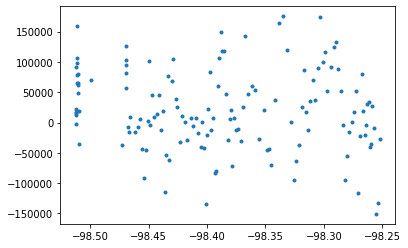

In [315]:
plt.plot(az,ON_TP0 , '.')

In [320]:
ON_TP_list[0]

<xarray.DataArray (t: 140)>
array([  18981.102 ,  -34947.156 ,   48083.64  ,   80684.17  ,
         64615.06  ,   62085.133 ,   64531.93  ,   77611.664 ,
         98758.34  ,  158907.1   ,  105530.14  ,   16551.379 ,
         91130.59  ,   16073.109 ,   22474.404 ,   -3173.9443,
         11782.064 ,   70402.445 ,  -36693.1   ,  -15059.011 ,
         56788.59  ,  126049.33  ,  103679.43  ,   82193.26  ,
         94196.055 ,   -7937.567 ,    9870.041 ,  -15049.148 ,
         -8183.426 ,    6115.05  ,  -44195.383 ,  -91824.7   ,
        -44546.656 ,    2060.6133,  101811.695 ,   -4478.6475,
         45179.082 ,    9246.982 ,   14245.6045,   45353.832 ,
        -11709.328 ,   18614.209 , -115375.016 ,  -52760.242 ,
         77388.13  ,  -61920.664 ,   69037.22  ,  104616.25  ,
         38338.617 ,   25735.68  ,  -32591.785 ,   10019.877 ,
          1160.3281,  -28022.543 ,    7355.9688,   -5161.839 ,
          8061.013 ,  -18072.998 ,  -40322.54  ,     908.5864,
        -41575.406 , -134421.34  ,  -19938.66  ,   22453.25  ,
         82530.95  ,  -11612.446 ,    8207.788 ,  -83757.61  ,
        -80217.64  ,   60841.07  ,  106896.89  ,  149417.62  ,
        117650.766 ,  118629.17  ,   47010.305 ,  -28891.803 ,
          6597.455 ,   20445.271 ,  -71642.8   ,    6780.133 ,
        -12694.129 ,  -10861.877 ,  -30317.584 ,   25325.041 ,
        141899.1   ,   47769.688 ,   59788.484 ,   53825.812 ,
        -26392.453 ,   20242.154 ,  -44629.77  ,  -43424.562 ,
        -69576.17  ,   37287.92  ,  163791.62  ,  175181.61  ,
        119908.55  ,    1317.5469,  -94909.516 ,  -62774.64  ,
        -37689.312 ,   24746.197 ,   86773.195 ,   16564.918 ,
        -12302.613 ,   34797.59  ,   69323.19  ,   37535.08  ,
         89781.875 ,  173813.67  ,   99975.984 ,  116900.98  ,
         52529.793 ,   91207.484 ,  125168.336 ,  132796.19  ,
         87988.84  ,   52546.445 ,   -3693.5938,  -94532.11  ,
        -55989.6   ,  -15669.23  ,    1500.6484,   16775.816 ,
         51519.54  , -115942.47  ,  -22233.852 ,   80454.305 ,
         18523.482 ,  -20971.383 ,   -4891.004 ,   30079.898 ,
         34483.8   ,  -41153.152 ,  -35420.65  ,   26511.89  ,
         -9321.221 , -150701.5   , -133278.06  ,  -27563.693 ],
      dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -98.26 -98.25 -98.25
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 47.02 47.02 47.01 47.01

In [321]:
az_0 = ON_TP_list[0]['azlist']

In [322]:
az_0

<xarray.DataArray 'azlist' (t: 140)>
array([-98.50925328, -98.50990424, -98.51016658, -98.51045339,
       -98.51060593, -98.51083475, -98.51097411, -98.51114   ,
       -98.51133051, -98.51145237, -98.51163516, -98.51183059,
       -98.51197881, -98.51211024, -98.5122839 , -98.51255085,
       -98.5123259 , -98.49915339, -98.47292346, -98.46694202,
       -98.46973638, -98.46934653, -98.46922881, -98.46920682,
       -98.46917094, -98.4679283 , -98.46586618, -98.46174152,
       -98.45877083, -98.45735696, -98.45536194, -98.4538355 ,
       -98.45250955, -98.45095793, -98.4497933 , -98.44856333,
       -98.44696922, -98.44529224, -98.44292143, -98.4409831 ,
       -98.43945233, -98.43749834, -98.43606362, -98.43473831,
       -98.433521  , -98.43218422, -98.43041294, -98.42880378,
       -98.42685341, -98.42531473, -98.42343487, -98.42113663,
       -98.41866356, -98.41689459, -98.41412771, -98.41212363,
       -98.40977705, -98.40801397, -98.4055136 , -98.40395927,
       -98.4024139 , -98.40117598, -98.40013866, -98.39880193,
       -98.39738706, -98.39621064, -98.39481742, -98.3933644 ,
       -98.3919628 , -98.3908451 , -98.38971446, -98.38835328,
       -98.38689342, -98.38523045, -98.38378236, -98.38207944,
       -98.3807541 , -98.37959175, -98.37839642, -98.37696006,
       -98.37535916, -98.37363049, -98.37108635, -98.36920361,
       -98.36745824, -98.36526641, -98.36186104, -98.3585558 ,
       -98.35524099, -98.35111554, -98.34866503, -98.34696775,
       -98.34533701, -98.34194842, -98.33833574, -98.33494516,
       -98.3315708 , -98.32846403, -98.32602486, -98.32414308,
       -98.32132913, -98.31853828, -98.31670386, -98.31523979,
       -98.31353901, -98.31172682, -98.30938907, -98.30733604,
       -98.30545466, -98.30325207, -98.30081411, -98.29896319,
       -98.29717681, -98.29436051, -98.29158676, -98.28969197,
       -98.28774815, -98.28546338, -98.28363213, -98.281848  ,
       -98.2802202 , -98.27829574, -98.27636583, -98.27439628,
       -98.27254673, -98.27107328, -98.26913134, -98.26763762,
       -98.26629448, -98.26509093, -98.26398151, -98.26296637,
       -98.26182324, -98.2607134 , -98.25957126, -98.25850592,
       -98.2569945 , -98.25556559, -98.25392927, -98.25209663])
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -98.26 -98.25 -98.25
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 47.02 47.02 47.01 47.01

In [323]:
len(ON_TP_list)

31

In [328]:
az_list = []
for i in range(len(ON_TP_list)):
    az = ON_TP_list[i]['azlist']
    az_list.append(az)

In [329]:
az_list

[<xarray.DataArray 'azlist' (t: 140)>
 array([-98.50925328, -98.50990424, -98.51016658, -98.51045339,
        -98.51060593, -98.51083475, -98.51097411, -98.51114   ,
        -98.51133051, -98.51145237, -98.51163516, -98.51183059,
        -98.51197881, -98.51211024, -98.5122839 , -98.51255085,
        -98.5123259 , -98.49915339, -98.47292346, -98.46694202,
        -98.46973638, -98.46934653, -98.46922881, -98.46920682,
        -98.46917094, -98.4679283 , -98.46586618, -98.46174152,
        -98.45877083, -98.45735696, -98.45536194, -98.4538355 ,
        -98.45250955, -98.45095793, -98.4497933 , -98.44856333,
        -98.44696922, -98.44529224, -98.44292143, -98.4409831 ,
        -98.43945233, -98.43749834, -98.43606362, -98.43473831,
        -98.433521  , -98.43218422, -98.43041294, -98.42880378,
        -98.42685341, -98.42531473, -98.42343487, -98.42113663,
        -98.41866356, -98.41689459, -98.41412771, -98.41212363,
        -98.40977705, -98.40801397, -98.4055136 , -98.40395927,
  

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


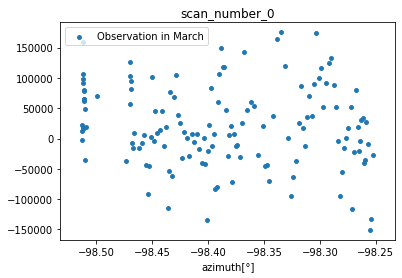

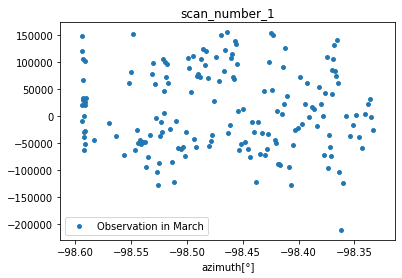

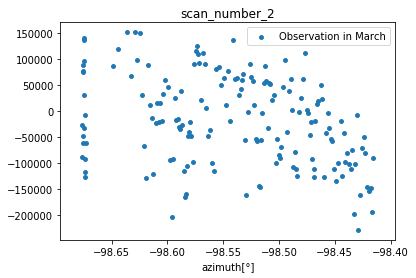

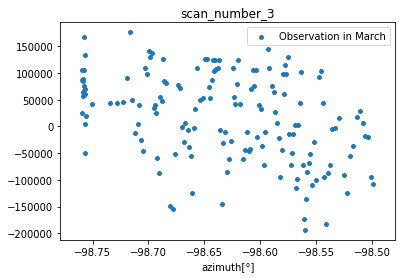

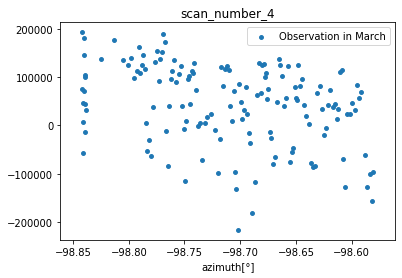

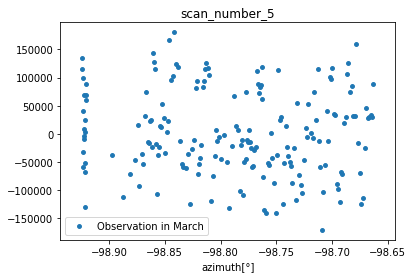

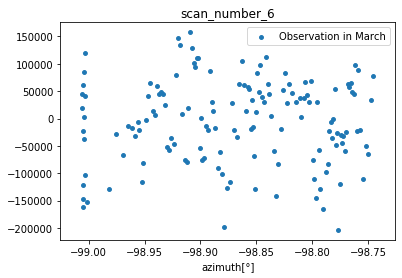

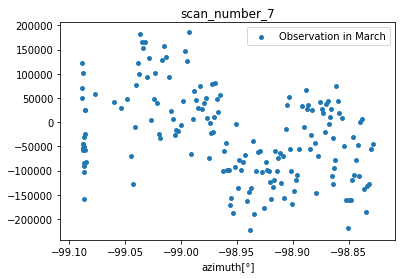

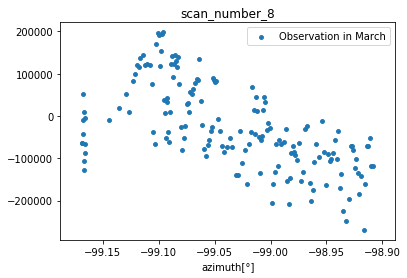

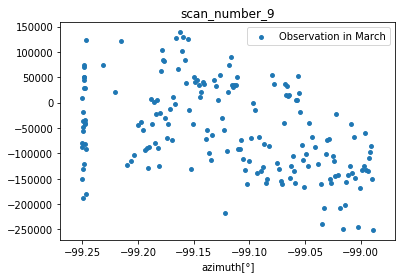

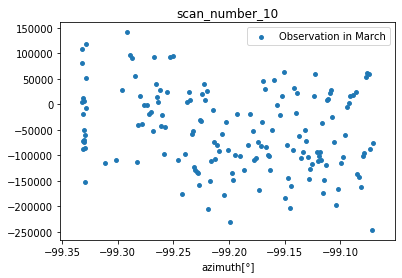

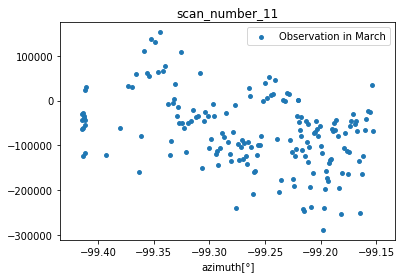

In [ ]:
for i in range(len(az_list)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(az_list[i],ON_TP_list[i], s=15, label='Observation in March')
    ax.set_title('scan_number_' + f'{i}')
    ax.set_xlabel('azimuth[°]')
    ax.legend()
    #fig.savefig(f'/home/amigos/seigyo/analy/notebook_2020/Nishioka/per_az/az_T*{i}.pdf')